Author: Nik Alleyne <br>
Author Blog: **https://www.securitynik.com** <br>
Author GitHub: **github.com/securitynik** <br>

Author Books: [  <br>

                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/", 
                
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
            ] 


### Why this series?
When teaching the SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals 
**https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/** I am always asked,
"Will you be sharing your demo notebooks?" or "Can we get a copy of your demo notebooks?" or ... well you get the point.
My answer is always no. Not that I do not want to share, (sharing is caring :-D) , but the demo notebooks 
by themselves, would not make sense or add real value. Hence, this series! 

This is my supplemental work, similar to what I would do in the demos but with a lot more details and references.

## 10. Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics

### The series includes the following: <br>
01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning - Classification, Tensorflow <br>
17 - Beginning Deep Learning - Classification, Pytorch <br>
18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
22 - Beginning Model TFServing <br>

But conn.log is not the only log file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

23 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
24 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
25 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 25 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

If you find this series beneficial, I would greatly appreciate your feedback.

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
# This is the data we previously saved from the Pandas notebook
#   04 - Beginning Pandas
# Because we have labels, we can use supervise learning
df_conn = pd.read_csv(r'df_conn_100k_with_suspicious_labels.csv')
df_conn

,Unnamed: 0,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,lof_label,lof_neg_out_factor,iso_label,suspicious
0,0,127.0.0.1,27762,127.0.0.1,58552,0.0,0,0,0,0,0,0,-1,-5.383255e+12,-1,1
1,1,192.168.0.4,27761,192.168.0.4,48798,0.0,0,0,0,0,0,0,-1,-2.381626e+12,-1,1
2,2,192.168.0.4,27761,192.168.0.4,48804,0.0,0,0,0,0,0,0,-1,-1.819608e+00,-1,1
3,3,127.0.0.1,27762,127.0.0.1,58568,0.0,0,0,0,0,0,0,-1,-9.551511e+00,-1,1
4,4,192.168.0.4,48786,192.168.0.4,27761,0.0,0,0,0,0,0,0,-1,-1.510551e+12,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,192.168.0.4,49522,192.168.0.4,9200,0.0,0,0,0,0,0,0,1,-1.000000e+00,1,0
99996,99996,192.168.0.4,43972,192.168.0.4,9200,0.0,0,0,0,0,0,0,1,-1.000000e+00,1,0
99997,99997,192.168.0.4,44254,192.168.0.4,9200,0.0,0,0,0,0,0,0,1,-1.000000e+00,1,0
99998,99998,192.168.0.4,44094,192.168.0.4,9200,0.0,0,0,0,0,0,0,1,-1.000000e+00,1,0


In [3]:
# From above, it looks like we have two index columns
# Let's drop that "Unnamed: 0"
df_conn = df_conn.drop(columns='Unnamed: 0', inplace=False)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,lof_label,lof_neg_out_factor,iso_label,suspicious
0,127.0.0.1,27762,127.0.0.1,58552,0.0,0,0,0,0,0,0,-1,-5.383255e+12,-1,1
1,192.168.0.4,27761,192.168.0.4,48798,0.0,0,0,0,0,0,0,-1,-2.381626e+12,-1,1
2,192.168.0.4,27761,192.168.0.4,48804,0.0,0,0,0,0,0,0,-1,-1.819608e+00,-1,1
3,127.0.0.1,27762,127.0.0.1,58568,0.0,0,0,0,0,0,0,-1,-9.551511e+00,-1,1
4,192.168.0.4,48786,192.168.0.4,27761,0.0,0,0,0,0,0,0,-1,-1.510551e+12,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,192.168.0.4,49522,192.168.0.4,9200,0.0,0,0,0,0,0,0,1,-1.000000e+00,1,0
99996,192.168.0.4,43972,192.168.0.4,9200,0.0,0,0,0,0,0,0,1,-1.000000e+00,1,0
99997,192.168.0.4,44254,192.168.0.4,9200,0.0,0,0,0,0,0,0,1,-1.000000e+00,1,0
99998,192.168.0.4,44094,192.168.0.4,9200,0.0,0,0,0,0,0,0,1,-1.000000e+00,1,0


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html

In [4]:
# We've done a ton of the heavy lifting already, in the earlier notebooks.
#   01 - Beginning Numpy
#   04 - Beginning Pandas
#   05 - Beginning Matplotlib
#   06 - Beginning Data Scaling
#   07 - Beginning Principal Component Analysis (PCA)
#   08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor
#   09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN

# Let's jump straight into setting up our X_data and y_labels
# At the same time, let's get the X_data as numpy array rather than keeping them as DataFrames and Series respectively
# While the original dataset above has 15 features, we only need 8 for now
X_data = df_conn[['id.resp_p', 'duration', 'orig_bytes', 'resp_bytes', 'orig_pkts',
                   'orig_ip_bytes','resp_pkts',	'resp_ip_bytes']].values
X_data

array([[58552.,     0.,     0., ...,     0.,     0.,     0.],
       [48798.,     0.,     0., ...,     0.,     0.,     0.],
       [48804.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [ 9200.,     0.,     0., ...,     0.,     0.,     0.],
       [ 9200.,     0.,     0., ...,     0.,     0.,     0.],
       [ 9200.,     0.,     0., ...,     0.,     0.,     0.]])

In [5]:
# Get the y_labels
# We will extract the suspicious column
y_labels = df_conn['suspicious'].values
y_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [6]:
# Get the unique labels
np.unique(y_labels)

array([0, 1], dtype=int64)

In [7]:
# Get a count of those unique values
np.bincount(y_labels)

array([99143,   857], dtype=int64)

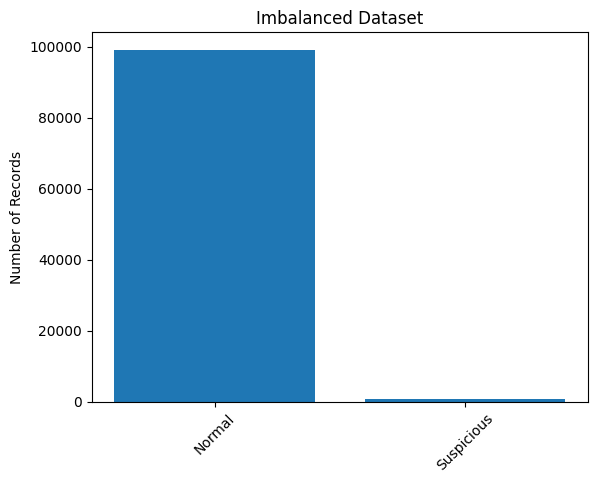

In [8]:
# Plot this data 
plt.title('Imbalanced Dataset')
plt.grid(visible=False)
plt.bar(x=np.unique(y_labels), height=np.bincount(y_labels))
plt.xticks(ticks=[0,1], labels=['Normal', 'Suspicious'], rotation=45)
plt.ylabel(ylabel='Number of Records')
plt.show()

In [9]:
# What is the shape of both of these datasets
# Well we see below that we have the 100K records
X_data.shape, y_labels.shape

((100000, 8), (100000,))

In [10]:
# We now have everything we need for supervised learning
# Import the library needed to standardize the data
from sklearn.preprocessing import StandardScaler

In [11]:
# One of the things we did in the notebook when we learned about scaling was to fit on the entire dataset.
#   06 - Beginning Data Scaling
# That was acceptable for that situation. However, for our classification problem, that approach should not be taken
# First let's split our dataset into train and test sets
# You should also consider having an evaluation dataset
# To do so, let's import a tool to help make our job easier splitting the data into train and test
from sklearn.model_selection import train_test_split

In [12]:
# Now let's split the dataset
# Because the classes are imbalanced, we want to ensure we have a proper ratio of the classes, across the train and test sets
# hence the reason for using stratify=y_labels
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.3, 
                                                    train_size=0.7, stratify=y_labels, random_state=10)

# After splitting, get the shape of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((70000, 8), (70000,), (30000, 8), (30000,))

In [13]:
# Here is where we do things differently, than what was done in the previous notebooks.
# Rather than fit on the entire dataset, we fit on the training data only
# Remember, we fit only on the training data
sc = StandardScaler(with_mean=True, with_std=True).fit(X_train)

# Now we transform, the training data
X_train_scaled = sc.transform(X_train)

# Similarly we transform the test set
X_test_scaled = sc.transform(X_test)

# Taking a snapshot of both train and test set
X_train_scaled[:2], X_test_scaled[:2]

(array([[ 0.12727181, -0.05436077, -0.02256638, -0.01808376, -0.02492499,
         -0.03301617, -0.00916296, -0.01065578],
        [-0.29214159, -0.04134945, -0.01659616, -0.01808376, -0.02006571,
         -0.0262497 , -0.00916296, -0.01065578]]),
 array([[ 0.12727181, -0.05436077, -0.02256638, -0.01808376, -0.02492499,
         -0.03301617, -0.00916296, -0.01065578],
        [-0.86702251, -0.05435968, -0.02256638, -0.01808376, -0.02249535,
         -0.03053831, -0.0085046 , -0.01063776]]))

In [14]:
# Let's also take advantage of PCA
# Using sklearn PCA  
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html 
# We learned about PCA in 
#   07 - Beginning Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

In [15]:
# We operate on PCA the way as we did above with scaling
# Once again, we fit on the train data and transform both the train and test data
pca = PCA(n_components=6, random_state=10).fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)

# Transforming the test set
X_test_scaled_pca = pca.transform(X_test_scaled)

# Sample showing two of the transformed data
X_train_scaled_pca[:2], X_test_scaled_pca[:2]

(array([[-0.0444545 , -0.0772815 ,  0.11715776, -0.00106767, -0.0141236 ,
         -0.00353413],
        [-0.0375093 ,  0.01151439, -0.28622856,  0.07316567, -0.01019356,
         -0.00241356]]),
 array([[-0.0444545 , -0.0772815 ,  0.11715776, -0.00106767, -0.0141236 ,
         -0.00353413],
        [-0.03845976,  0.10090618, -0.84274351,  0.18717342, -0.0139641 ,
         -0.00459374]]))

We will start with Logistic Regression as we are doing a binary classification. <br>
It is either the sample is suspicious or not. Yes or No. True or False. 1 or 0. <br>
Logistic Regression makes a binary decision <br>
The good thing also about Logistic Regression, is rather than just suspicious or not, <br>
we can get the probabilities to help us understand why the model things a sample is suspicious or not. <br>
Note, there is no guarantee that this model will work best for this 6 dimension dataset. <br>
In the notebooks based on PCA and Pandas, we saw that two particular features had a strong positive linear correlation <br>
&emsp;   04 - Beginning Pandas <br>
&emsp;   07 - Beginning Principal Component Analysis (PCA) <br>

Those two features might be good candidates for Logistic Regression <br>
For now, we are using Logistic Regression as it is relatively easy to explain its basic operation <br>
In the notebook on classification with deep learning, the sigmoid activation function was used. <br>
&emsp;   16 - Beginning Deep Learning - Classification, Tensorflow <br>
&emsp;   17 - Beginning Deep Learning - Classification, Pytorch <br>
&emsp;   18 - Beginning Deep Learning - Classification - regression - MIMO - Functional API Tensorflow <br> 
    
Logistic Regression is basically that same sigmoid function.

In [16]:
# With the sigmoid, rather that a straight line, want to plot a S-shape curve, which has values between 0 and 1
# Consider these values our probabilities
# Let's create our sigmoid function
def my_sigmoid(z: int) -> float:
    ''' Computes the sigmoid of z 

        Arg:
            z: An integer value

        Returns:
            The sigmod of the value
    
    '''
    return 1 / (1 + np.exp(-(z)))

In [17]:
# Calling my_sigmoid function
# Now any value we give to this function will be squashed between 0 and 1
# thus we can use these values as probabilities

# Here we use three values -10, 0, 10
# notice they are all between 0 and 1

# The sigmoid of 0 is 0.5. Hence any number greater than 0 will classified as 1
# and anything less than 0 is classified as 0.
# This above assumes 0.5 threshold
round(my_sigmoid(-10)), my_sigmoid(0), my_sigmoid(10)

(0, 0.5, 0.9999546021312976)

In [18]:
# As for that S-shaped curve
# Let's generate 20 float numbers between -10 and 10. The numbers should step by 1
x = np.arange(start=-10, stop=10, step=1, dtype=float)
x

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

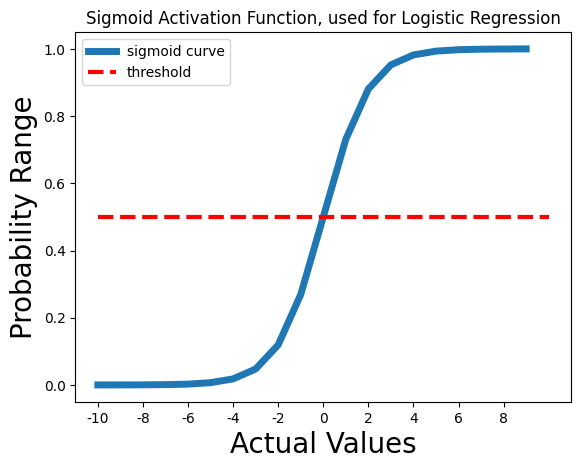

In [19]:
# Let's now plot these values
# At the same time, let's draw the threshold line at 0.5
# On this curve, anything above 0.5 would be considered a 1 - suspicious
# Anything below would be 0 - Non suspicious
plt.title('Sigmoid Activation Function, used for Logistic Regression')
plt.plot(x, my_sigmoid(x), label='sigmoid curve', ls='-', lw=5)
plt.xlabel('Actual Values', fontdict={'size':20})
plt.ylabel('Probability Range', fontdict={'size':20})
plt.hlines(y=0.5, xmin=-10, xmax=10, color='red', linestyles='--', label='threshold', linewidth=3)
plt.xticks(range(-10,10,2), range(-10,10,2) )
plt.legend(loc='best')

From above, if the result returned is greater than or equal 0.5, we can predict 1. <br>
Else, if the result returned is less than 0.5 we predict 0 <br>
This is helpful when you want hard predictions <br>
Otherwise, we can just take the probabilities <br>

Keep in mind the threshold does not have to be 0.5 but typically is. <br>
Define a threshold based on your business security needs <br>

Additionally, as can be seen from above, the values can only be between 0 and 1 <br>

With a understanding of the Sigmoid Activation Function time to move on to the objective function. <br>
For Logistic Regression, we want to maximize the log-likelihood function (LLF) <br>
This is otherwise called maximum likelihood estimation <br>
This is done using the loss function with equation <br>

cost = -(1/m) * sum( yi * log(y^) + (1-yi) * log(1-y^)) <br>

This cost function comes from the principal of maximum likelihood from statistics <br>
We ultimately want to get the best possible weights <br>

-- We can also use binary cross entropy as a loss function <br>

Backprop - formula for derivative of loss with respect to weight and bias <br>
dl/dw = 1/m * (y^ - y) * x <br>
dl/db = 1/m * (y^ - y) <br>

For gradient descent, update the weight with  <br>
w := w - lr * ( 1/m * (y^ - y) * x) <br>

For the Bias we update the weight with <br>
b := b -lr * (1/m * (y^ - y)) <br>


This algorithm looks identical to linear regression gradient descent <br>

Additional References and good reads/videos: <br>
https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy <br>
https://www.youtube.com/watch?v=Pm8mRCZmYiU <br>
https://www.youtube.com/watch?v=YYEJ_GUguHw <br>
https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera/blob/main/C1%20-%20Supervised%20Machine%20Learning:%20Regression%20and%20Classification/week3/C1W3A1/C1_W3_Logistic_Regression.ipynb <br>
https://developer.ibm.com/articles/implementing-logistic-regression-from-scratch-in-python/ <br>
https://medium.com/geekculture/logistic-regression-implementation-from-scratch-in-python-f9d6cd4a0747 <br>
https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451 <br>

In [20]:
# Building a small toy dataset
x = np.array([[2., 2],[3,1]], ndmin=2, dtype=np.float32)
y = np.array([0, 1], ndmin=1, dtype=np.float32)

# This is what the dataset looks like
x_y = np.hstack((x, y.reshape(-1, 1)))
x_y

array([[2., 2., 0.],
       [3., 1., 1.]], dtype=float32)

In [31]:
# Ensure we can repeat this experiment with random number generators
# set the random seed
np.random.seed(10)

# Our simple linear formula is
# y = w * x + b

# Set the bias to 1
bias = 1

# Set the weight based on the shape of the input
# Keep in mind this weight vector may need to be transposed
w = np.random.rand(x.shape[1], ).reshape(1, -1)
w, ' ->', bias

(array([[0.77132064, 0.02075195]]), ' ->', 1)

In [32]:
# Note, because our x has two features, we have 2 values for weights
# Compute the linear part of the equation
# This is the 
#    y = (w1 * x1) + (w2 * x2) + b
z = x.dot(w.T) + bias
z

array([[2.58414519],
       [3.33471388]])

In [33]:
# Plug the returned results into my sigmoid function
z_sigmoid = my_sigmoid(z)
z_sigmoid

array([[0.92983419],
       [0.96560069]])

In [34]:
# Define the binary crossentropy cost function
# https://sparrow.dev/binary-cross-entropy/
def binary_crossentropy( y_true:float, y_pred:float ) -> float:
    ''' Calculates the binary crossentropy loss for each sample 

        Args:
            y_true: Numpy Array of true labels
            y_pred: Numpy Array consisting of predictions
            
        Returns:
            loss (float) : Returns the binary crossentropy loss
        '''
    return -(y_true * np.log(y_pred) + (1-y_true) * np.log(1 - y_pred)).mean()

In [35]:
# Test the binary_Crossentropy and sigmoid
#binary_crossentropy(np.array([1]), np.array([0.8]))
binary_crossentropy(y[0], z_sigmoid[0]), binary_crossentropy(y[1], z_sigmoid[1])

(2.6568941800478796, 0.03500489458878745)

In [36]:
# Setup a class for Logistic Regression

class myLogisticRegression:
    ''' Perform Logistic Regression '''

    def __init__(self):
        ''' Initialize the constructor '''
        self.weights = 0.
        self.bias = 0.

    def my_sigmoid(self, z):
        ''' Computes the sigmoid of z 

        Args:
            z: An integer value
        
        Returns:
            The sigmoid of z
        
        '''
        return 1 / (1 + np.exp(-(z)))

    def fit(self, x, y, epochs=10, learning_rate=0.1):
        ''' 
        Fits the model 
        
        Args:
            x: A numpy array consisting of one or more features
            y: A vector of labels
            epochs: A integer to determine the number of times to go through the dataset
            learning_rate: Determines the step size for gradient descent
        Returns:
            The weights, bias and cost of the learned model
        '''
        
        num_samples, num_features = x.shape
        self.weights = np.zeros(num_features)
        self.cost = []

        print(f'processing: {num_samples} samples, num features: {num_features}, \t Initial Bias: {self.bias}')

        for epoch in range(0, epochs, 1):
            y_pred = self.my_sigmoid(np.dot(x, self.weights) + self.bias)
            loss = -np.mean(y * np.log(y_pred) + (1-y) * np.log(1-y_pred) )
            self.cost.append(loss.mean())

            # partial derivative of loss with respect to weights
            dl_dw = 1/num_samples * np.dot(x.T, (y_pred - y))
            self.weights = self.weights - (learning_rate * dl_dw)

            # partial derivative of loss with respect to bias
            dl_db = ( y_pred - y ).mean()
            self.bias = self.bias - (learning_rate * dl_db)

            if epoch %10 == 0:
                print(f'Epoch: {epoch} \t loss: {loss.mean()}')

        return self.weights, self.bias

    def predict(self, X):
        ''' Make a prediction '''
        return self.my_sigmoid(np.dot(X, self.weights) + self.bias)

In [37]:
# Test how well my Logistic Regression works
my_lr = myLogisticRegression()
my_lr.fit(x=X_train_scaled_pca, y=y_train, epochs=100, learning_rate=0.1)

processing: 70000 samples, num features: 6, 	 Initial Bias: 0.0
Epoch: 0 	 loss: 0.6931471805599453
Epoch: 10 	 loss: 0.5006775355237946
Epoch: 20 	 loss: 0.38194593715178715
Epoch: 30 	 loss: 0.3053002659911712
Epoch: 40 	 loss: 0.25331663285506206
Epoch: 50 	 loss: 0.21644725842845022
Epoch: 60 	 loss: 0.18928309533968166
Epoch: 70 	 loss: 0.16862259211859326
Epoch: 80 	 loss: 0.15248607935144556
Epoch: 90 	 loss: 0.1395993340137424


(array([0.05668211, 0.04884507, 0.029753  , 0.01151449, 0.01204584,
        0.00720559]),
 -2.136636059879475)

In [38]:
# Nice to see above the loss is reducing after each epoch
# If we wanted to get the model weights, we do ...
my_lr.weights

array([0.05668211, 0.04884507, 0.029753  , 0.01151449, 0.01204584,
       0.00720559])

In [39]:
# We have 6 weights above, one to represent each feature
# If we revisit our dataset, we see 6 features
X_test_scaled_pca.shape

(30000, 6)

In [40]:
# Similarly, if we wanted to get the bias from my_lr, we do ...
my_lr.bias

-2.136636059879475

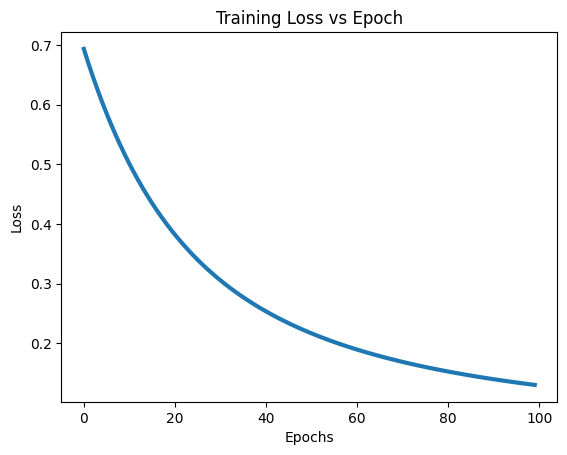

In [41]:
# Now that we have these parameters, we can make predictions on new data
# Let's detour first ...
# When looking at above, we can see the lost is reducing as we go through the learning process
# At epoch 0, the loss was 0.69... by epochs 90, it is 0.139....
# Get a plot of the loss
plt.title('Training Loss vs Epoch')
plt.plot(my_lr.cost, linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [42]:
# How well is my model doing?
# Import some metrics library from sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
# How is the model doing on the training data in terms of accuracy
accuracy_score(y_true=y_train, y_pred=np.round(my_lr.predict(X_train_scaled_pca)))

0.9914142857142857

In [44]:
# And the test data accuracy
accuracy_score(y_true=y_test , y_pred=np.round(my_lr.predict(X_test_scaled_pca)))

0.9914

In [45]:
# Too perfect to be true. No overfitting!
# If I did something wrong above and did not recognize it, let me know. 
# The train and test accuracy is too perfect!

In [46]:
# What does the confusion matrix say about the training data
confusion_matrix(y_true=y_train, y_pred=np.round(my_lr.predict(X_train_scaled_pca)))

array([[69392,     8],
       [  593,     7]], dtype=int64)

In [47]:
# What does the confusion matrix doing about the test data
confusion_matrix(y_true=y_test , y_pred=np.round(my_lr.predict(X_test_scaled_pca)))

array([[29738,     5],
       [  253,     4]], dtype=int64)

In [48]:
# With 99% accuracy on the training and test data, you would have expected much better classifications
# For example, on the training data, we have 593 False Negatives
# From the test data, we have 253 False Negatives. 
# These numbers are totally unacceptable, when we are dealing with security
# The last thing we need in security is False Negatives
# We may tolerate False Positives but False Negatives ... Nah!!!
# False negatives are situations where threat actors are on our network but our security tools did not detect them.
# This increases the dwell time. Absolutely unacceptable

In [49]:
# Even without looking at the confusion matrices above, we should not have gotten excited about the accuracy score. 
# Why? We learned from above, this dataset is highly imbalanced
# Model works but does terrible on the positive class. Class 1 : Negative class is class 0
# Confirm all of this by looking at the classification report.
# We will describe these metrics more later in this notebook
print(classification_report(y_true=y_test , y_pred=np.round(my_lr.predict(X_test_scaled_pca))))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29743
           1       0.44      0.02      0.03       257

    accuracy                           0.99     30000
   macro avg       0.72      0.51      0.51     30000
weighted avg       0.99      0.99      0.99     30000



In [50]:
# Let's import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

In [51]:
# Before getting into creating our model that will work on our real data, let's take a another small detour
# Let's say we have a dataset with 2 samples. 
# The dataset has 1 feature and one label
# Because Logistic Regression will need the two labels, let's give the first record a 1 and the second a 0
x = np.array([[2], [3]], ndmin=2, dtype=float)
y = np.array([0, 1])
x, y

(array([[2.],
        [3.]]),
 array([0, 1]))

In [52]:
# Stack the two items together to get a view of what the dataset looks like
np.hstack((x, y.reshape(-1, 1)))

array([[2., 0.],
       [3., 1.]])

In [53]:
# Building a simple Logistic Regression model
# Fit on our simple dataset
lr_model = LogisticRegression(fit_intercept=True).fit(x, y)
lr_model

LogisticRegression()

In [54]:
# Let's make a prediction
# We see the basically the same label that we provided 0 and 1.
# This is done on the test data, so there should be no surprises here
lr_model.predict(x)

array([0, 1])

In [55]:
# Let's grab the probabilities
# Each row represents one of our samples. 
# We have two samples, so two rows
lr_model.predict_proba(x)

array([[0.55535195, 0.44464805],
       [0.44464755, 0.55535245]])

In [56]:
# How do we know the class?
# One way, take the higher value in each vector via argmax
# As you can see, this returns 0 and 1 respectively.
# No surprises as for the first vector, the higher value is 0.55535195 at index 0
#   for the second vector, the higher value is 0.55535245 at index 1
np.argmax(lr_model.predict_proba(x), axis=0)

array([0, 1], dtype=int64)

In [57]:
# What we really need from here is the coefficient / weight (b_1) and our intercept / bias (b_0)
# One feature, one weight. Plus a bias
f'This is the coefficient/weight: {lr_model.coef_}, this is intercept/bias: {lr_model.intercept_}'

'This is the coefficient/weight: [[0.44463999]], this is intercept/bias: [-1.11159898]'

In [58]:
# Let's now take the bias and add it to the weight then multiply our input x
# y = mx + b
lr_model.intercept_ + (lr_model.coef_ * 2)

array([[-0.222319]])

In [59]:
# Take the value above and now run it through our sigmoid
# We see we get the same value returned by Logistic Regression
# Since this is less than the 0.5 threshold, this prediction is 0
my_sigmoid(lr_model.intercept_ + (lr_model.coef_ * 2))

array([[0.44464805]])

In [60]:
# We can do the same thing for the second sample, 3
# We see the results matches the Logistic Regression model
# With this, we should be clear on the direction we are heading.
# As this value is greater than 0.5, we get a 1
my_sigmoid(lr_model.intercept_ + (lr_model.coef_ * 3))

array([[0.55535245]])

In [61]:
# Import an additional metric to beautify our confusion matrix
# Reference:
#   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
#   https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics 

from sklearn.metrics import ConfusionMatrixDisplay

In [62]:
# Let's build a function to run through our different datasets
# The datasets being used are unscaled, scaled and PCA'd
# The idea is to see how algorithm performs with the same data from different perspectives

def build_model(x_train=None, x_test=None, y=y_train, y_test=y_test, model_name=None):
    ''' 
    builds the model 
    
    Args:
        x_train: Numpy array consisting of training data
        x_test: Numpy array consisting of testing data
        y_train: Vector of training labels
        y_test: Vector of testing labels
        model_name: String describing the model

    Returns:
        The logistic regression model
    '''

    print(f'Building Logistic Regression model: {model_name}')
    lr_model = LogisticRegression(penalty='l2', tol=1e-4, class_weight=None, \
                            fit_intercept=True, max_iter=100, random_state=10, n_jobs=-1 ).fit(x_train, y_train)
    print(f'Accuracy on train data: {accuracy_score(y_true=y_train, y_pred=lr_model.predict(x_train))}')
    print(f'Accuracy on test data: {accuracy_score(y_true=y_test, y_pred=lr_model.predict(x_test))}')
    cm = confusion_matrix(y_true=y_test, y_pred=lr_model.predict(x_test), labels=lr_model.classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_).plot(include_values=True, \
                                                                                 values_format='d', colorbar=True)
    return lr_model


Building Logistic Regression model: unscaled data
Accuracy on train data: 0.9915857142857143
Accuracy on test data: 0.9917


LogisticRegression(n_jobs=-1, random_state=10)

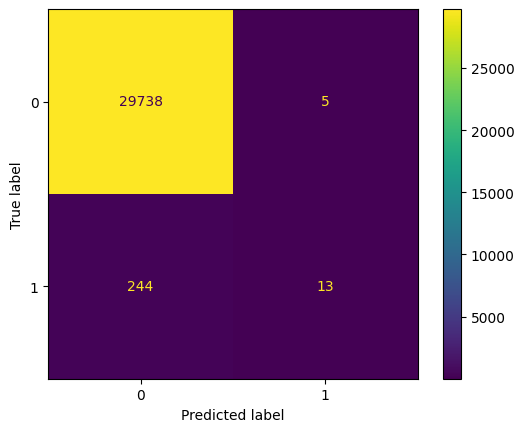

In [63]:
# Call the function
# We can see the model is reporting 99% Accuracy. AWESOME!!!
# Actually, NOT awesome. 
# Looking at the model, we see it has predicted 29738 items as True Negative - Correct
# 13 items as true positives - good stuff
# However, we have 5 false positives - not terrible
# 244 items are false negatives. We don't want false negative when we are monitoring our cyber security systems
# Hopefully the takeaway is that 99% accuracy means absolutely nothing in this context
# Later, we will look at the classification report and we will compute the metrics manually.
# We will calculate accuracy, precision, recall and F1-Score
build_model(x_train=X_train,x_test=X_test, model_name='unscaled data')

Building Logistic Regression model: scaled data
Accuracy on train data: 0.9915714285714285
Accuracy on test data: 0.9918666666666667


LogisticRegression(n_jobs=-1, random_state=10)

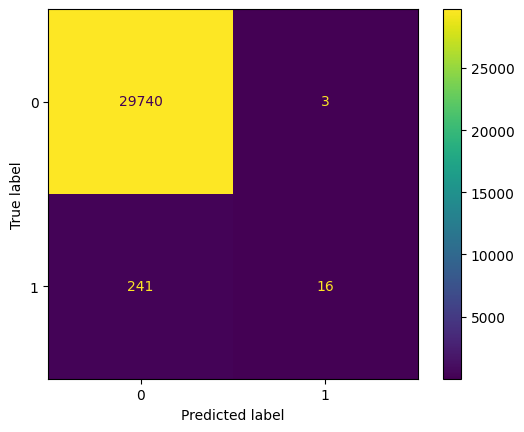

In [64]:
# Does the model perform better on the scaled data?!
# Let us find out
# The accuracy is much the same at 99%
# However, notice the smaller number of true positives, 
# smaller number of false positives but the increase in true negatives and false negatives
# Once again, accuracy means absolutely nothing
build_model(x_train=X_train_scaled, x_test=X_test_scaled, model_name='scaled data')

Building Logistic Regression model: scaled PCA data
Accuracy on train data: 0.9915571428571428
Accuracy on test data: 0.9918333333333333


LogisticRegression(n_jobs=-1, random_state=10)

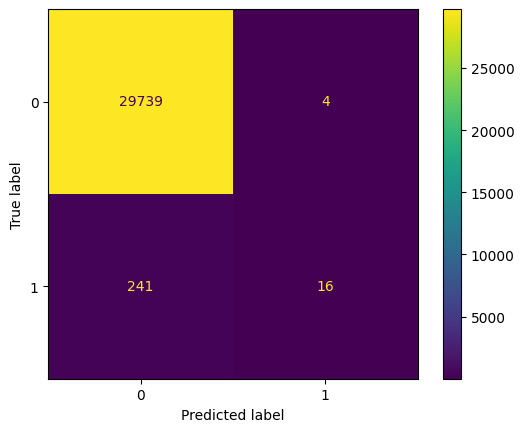

In [65]:
# Looking at the PCA'd data
# Have accuracy at 97% which is worse. 
# However, there is less false negatives.
# Maybe use this PCA'd data as a starting point.
build_model(x_train=X_train_scaled_pca, x_test=X_test_scaled_pca, model_name='scaled PCA data')

In [ ]:
# In the plotting function, I deliberately set a number of hyper-parameters such as "penalty", "tol", etc.
# However, how do I know those are the best values for this model? I don't know!
# Similarly, we should have seen from above, that accuracy is not the best score for us.
# Let's instead focus on recall of the positive class. -> 1
# Recall is out of all the positives, what percentage was actually predicted correctly
# From above, we have 241 samples which are positive
# The recall is then ( 16/257 ) * 100 = 6.2%. Terrible for now.
# Keep in mind, that as we optimize for recall, the precision is going to be impacted
# Similarly, if we optimize for precision, the recall will be impacted
# Maybe we can optimize for the f1-score.
# We will touch on these shortly.
# For now, let's try to tune our hyper-parameters

In [66]:
# Take advantage of Randomized Search Cross Validation
# To help find the best set of hyper-parameters
# For this to work, we will provide a set of hyperparameter values to try and this will create the parameter space
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# Setup Logistic Regression
lr_clf = LogisticRegression(solver='liblinear', max_iter=300, random_state=10)
lr_clf

LogisticRegression(max_iter=300, random_state=10, solver='liblinear')

In [68]:
# Setup our parameter space, based on Logistic Regression's hyper-parameters 
# Note this is just a small space I am setting up. You can literally add a large number of parameters to test
lr_parameters = {
   'penalty' : ['l2'], 
    'tol' : [1e-1, 1e-2],
    'C' : [1., 0.5],
    'class_weight' : [ {0:1, 1:4}, {0:1, 1:9} ],
}

In [69]:
# Call the RandomizeSearchCV
# Do a 5 fold cross validation. As in split the dataset into 5 parts with 4 being used for 
# train on each run with 1 for testing
# This will be done 5 times, hence 25 runs
# We know from above, accuracy was not a good measure. Let's use recall for our scoring
# Alternatively, we may choose instead the f1-score or precision
# We will see shortly how to calculate the f1-score, recall, precision, etc.

#fitting the model for 5 fold cross validation
lr_random_cv = RandomizedSearchCV(estimator=lr_clf, param_distributions=lr_parameters, \
                                  scoring='recall', n_iter=5, cv=5, random_state=10, \
                                    n_jobs=-1, verbose=1).fit(X_train_scaled_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [70]:
# Get the best parameters from this 5 fold cross validation
lr_random_cv.best_params_

{'tol': 0.01, 'penalty': 'l2', 'class_weight': {0: 1, 1: 9}, 'C': 1.0}

In [71]:
# Get the best score
lr_random_cv.best_score_

0.12499999999999997

In [72]:
# With these hyper-parameters returned, let' setup a function to train our model and get the metrics
def build_model(x_train=X_train_scaled_pca, x_test=X_test_scaled_pca, y_true=y_train, y_test=y_test, model_name=None):
    ''' 
    builds the model 
    
    Args:
        x_train: Numpy array consisting of training data
        x_test: Numpy array consisting of testing data
        y_train: Vector of training labels
        y_test: Vector of testing labels
        model_name: String describing the model

    Returns:
        lr: The logistic regression model
        cm: Confusion matrix
        clf_report: Classification report metrics
        lr.coef_: Logistic Regression weights, 
        lr.intercept_ = Logistic Regression Bias
    '''
    
    print(f'Building {model_name} model')

    # Train the model
    lr_model = LogisticRegression(penalty='l2', C=1, tol=0.01, class_weight={0: 1, 1: 9}, \
                                  fit_intercept=True, max_iter=300, random_state=10, n_jobs=-1 ).fit(x_train, y_train)
    print(f'Accuracy on train data: {accuracy_score(y_true=y_train, y_pred=lr_model.predict(x_train))}')
    print(f'Accuracy on test data: {accuracy_score(y_true=y_test, y_pred=lr_model.predict(x_test))}')
    
    # Setup the Confusion Matrix
    cm = confusion_matrix(y_true=y_test, y_pred=lr_model.predict(x_test), labels=lr_model.classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_).plot(include_values=True,\
                                                                                        values_format='d', colorbar=True)

    # Setup the classification report
    clf_report = classification_report(y_true=y_test, y_pred=lr_model.predict(x_test))
    return (lr_model, cm, clf_report, lr_model.coef_, lr_model.intercept_)

Building scaled PCA data with updated hyper-parameters model
Accuracy on train data: 0.9893428571428572
Accuracy on test data: 0.9899333333333333


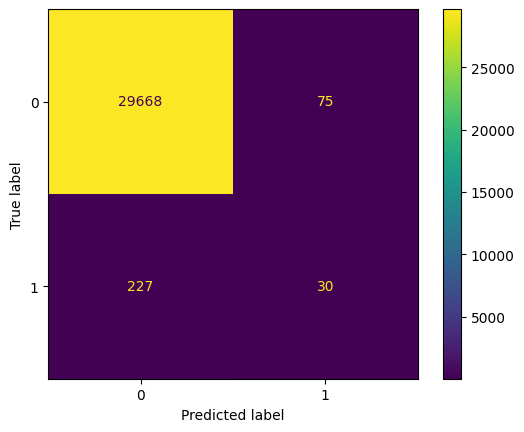

In [73]:
# Rebuild our final model
# The most important thing here is that we managed to reduce the false negatives
lr_model = build_model(x_train=X_train_scaled_pca, x_test=X_test_scaled_pca, \
                 model_name='scaled PCA data with updated hyper-parameters')

In [74]:
# Let's take a look at some metric
# We can access the items in the confusion matrix by doing
#   lr_model[1][0][0]
# This is possible because we return the confusion matrix also in our build_model function above
# First up, the misclassification rate
# With the misclassification rate, we want to know how many of the observations were incorrectly classified.
# Using the data from the confusion matrix above, we get
# False Negatives (227) + False Positives (75) / False Negatives (227) + False Positives (75) + \
#    True Negatives (29668) + True Positives (30)
# With that in mind 227+75 /  227 + 75 + 29688 + 30
# We then multiply everything by 100 to get the percent
# References:
#   https://www.statology.org/misclassification-rate/
# 
misclassification_rate = ( (227+75) /  (227 + 75 + 29688 + 30) ) * 100
misclassification_rate


1.0059960026648902

In [81]:
# Calculate the accuracy
# If we have a misclassification rate of 1.0059, then it means our accuracy should be 100 - 1.0059. 
# This give us 98.994 percent.
accuracy = round(100 - misclassification_rate,4)
accuracy

98.994

In [82]:
# Let's confirm 99% by looking at the data from our confusion matrix
# Let's find the ones that were predicted accurately
# True negatives (29668) + True Positive (30) / False Negatives (227) + 
#   False Positives (75) + True Negatives (29668) + True Positives (30)
accuracy = round(((29668 + 30) / (227 + 75 + 29668 + 30) ), 2)
accuracy, accuracy * 100

(0.99, 99.0)

In [83]:
# Calculate the recall of the positive class - 1
# Recall for the positive class (1) is, out of all the things which are TRULY positive. 
# How many of these were actually predicted correctly?|
# We have 227 False Negatives and 30 True Positives.
# Hence our equation looks like False Negatives (227) / False Negatives (227) + True Positives (30)
# We multiply by 100 to get the percentage
# False Negatives are those items which are 1s but were classified as 0
# From this we get 33% recall on the positive class. This is horrible for this particular problem
# 
recall_1 = round(( 30 / (227 + 30) ), 2)
recall_1, recall_1 * 100

(0.12, 12.0)

In [84]:
# Let's see the recall on the negative class - 0 
# Using the same concept as above, out of all the things negatives, how many were actually negatives
# For this, we have ( 29668 / (29668 + 75) ) * 100
# Below shows the model is doing excellent on the negative class
recall_0 = round(( 29668 / (29668 + 75) ),2)
recall_0 , recall_0 * 100

(1.0, 100.0)

In [85]:
# Calculate the precision on the positive class - 1
# The precision is, out of the things PREDICTED as positive, how many were actually positives
# For this, we once again revisit the confusion matrix we see 75 False Positives + 30 True Positives.
# However, the 30 represents the true predictions
# Calculating ( 30 / ( 75 + 30 ) ) * 100 
# This shows 28.57% precision on the positive class
# Once again terrible. Hopefully, so far we can conclude, Logistic Regression may not be the best fit for this data
# At least not from the features we have
precision_1 = round(( 30 / ( 75 + 30 ) ), 2)
precision_1, precision_1 * 100


(0.29, 28.999999999999996)

In [86]:
# Getting the precision of the negative class - 0
# Once again, the precision is from the things PREDICTED s negative, how many are actually negative
# That is from the True Negatives / True Negatives + False Negatives
# This would be ( 29668 / (29668 + 227 ) ) * 100
# This formulas give us 99% precision on the negative class
# How I wish it was 99% precision on the positive class :-( 
precision_0 = round(( 29668 / (29668 + 227 ) ), 2)
precision_0, precision_0 * 100

(0.99, 99.0)

In [87]:
# We already saw that accuracy is not the best measurement for this problem 
# Keep in mind, Precision and Recall have their own issues
# First off these two are trade off.
# As you improve the precision, the recall is going to be reduced
# Similarly, as you improve the recall, the precision is going to be reduced
# The balance to this trade off is the f1-score
# The formula for f1 is - 2*((recall * precision) / (recall + precision) )
# Below we see 99.4936. If we round this up, we would get to 99
# Starting off with the negative class - 0
#
# Reference:
# https://inside-machinelearning.com/en/recall-precision-f1-score-simple-metric-explanation-machine-learning/
f1_score_0 = round(2 * ( ( precision_0 * recall_0 ) / ( precision_0 + recall_0 ) ), 2)
f1_score_0, f1_score_0 * 100

(0.99, 99.0)

In [88]:
# Calculating f1-score for the positive class - 1
f1_score_1 = round(2 * ( ( precision_1 * recall_1 ) / ( precision_1 + recall_1 ) ),2)
f1_score_1, f1_score_1 * 100

(0.17, 17.0)

In [89]:
# All that we just did above, could have easily been had via the classification report as shown below
# Looking at below and if we did all of our calculations above correctly, then our values for precision, 
# recall, f1-score and accuracy should all be aligned 
print(lr_model[2])

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29743
           1       0.29      0.12      0.17       257

    accuracy                           0.99     30000
   macro avg       0.64      0.56      0.58     30000
weighted avg       0.99      0.99      0.99     30000



In [90]:
# Now that we have all of that, let's get the weights and biases from Logistic Regression, 
# to close out and further confirm the basic computation.
# Remember the formula for our simple example was 
# b_0 + b_1 * x1
# In this case, we have 6 coefficients as seen below
# Consider these 6 coefficients as b1, b2, b3, b4, b5 and b6
# Realistically, most of the times rather than b1, b2, etc., you are going to see w1, w2, w3, etc.
# Hence we will call these weights -> w
lr_weights = lr_model[3]
lr_weights

array([[ 1.46218279,  0.52372347,  0.37014656, -0.25826061, -0.56892307,
         4.3259332 ]])

In [91]:
# Assigning the weight to individual w
# Flattening he two dimension vector before assigning the values
lr_weights = lr_weights.flatten()
w1, w2, w3, w4, w5, w6 = lr_weights[0], lr_weights[1], lr_weights[2], lr_weights[3], lr_weights[4], lr_weights[5]
w1, w2, w3, w4, w5, w6

(1.462182787975767,
 0.523723473258835,
 0.3701465558645898,
 -0.2582606055139651,
 -0.5689230653978901,
 4.325933199205448)

In [92]:
# With the weights in place, let's get the bias
lr_bias = bias = lr_model[4]
lr_bias

array([-2.7951926])

In [93]:
# Extracting the first test record from our scaled dataset
X_test_scaled_pca[0]

array([-0.0444545 , -0.0772815 ,  0.11715776, -0.00106767, -0.0141236 ,
       -0.00353413])

In [94]:
# Now, let's run our manual process against this first record
# Let's add each value in X_test_scaled_pca[0] to an x 
x1, x2, x3, x4, x5, x6 = X_test_scaled_pca[0][0], X_test_scaled_pca[0][1], \
    X_test_scaled_pca[0][2], X_test_scaled_pca[0][3], X_test_scaled_pca[0][4], X_test_scaled_pca[0][5]
x1, x2, x3, x4, x5, x6 

(-0.044454498651557345,
 -0.07728149760372537,
 0.11715776468636946,
 -0.0010676729948543443,
 -0.014123603189567875,
 -0.0035341292778464854)

In [95]:
# Running our formula
weighted_sum = (w1 * x1) + (w2 * x2) + (w3 * x3) + (w4 * x4) + (w5 * x5) + (w6 * x6) + bias
weighted_sum

array([-2.86427922])

In [96]:
# Now that we have our weighted sum, let's run our sigmoid function against this
# this is the exact value we got from Logistic Regression's predict_proba above
my_sigmoid(weighted_sum)

array([0.05394788])

In [97]:
# Now just to be clear, above was meant for us to learn this the hard way. 
# Realistically, we could have simply find the dot product of x[0] and the transposed lr_weights_ then add the bias,
# like this
weighted_sum = np.dot(X_test_scaled_pca[0], lr_weights.T) + lr_bias
weighted_sum

array([-2.86427922])

In [98]:
# once again, run our sigmoid against the weighted sum
# As seen above, the result is consistent.
my_sigmoid(weighted_sum)

array([0.05394788])

In [99]:
# Arite! Time to save our model
# Import the joblib library
from joblib import dump, load
import os

In [100]:
# Rebuild the model for saving
# Using the same hyper-parameters and data
clf_logistic_r = LogisticRegression(penalty='l2', C=1, tol=0.01, class_weight={0: 1, 1: 9},\
                                     fit_intercept=True, max_iter=300, random_state=10, n_jobs=-1 )
clf_logistic_r.fit(X_train_scaled_pca, y_train)
clf_logistic_r

LogisticRegression(C=1, class_weight={0: 1, 1: 9}, max_iter=300, n_jobs=-1,
                   random_state=10, tol=0.01)

In [101]:
# With the joblib library imported, saving the model
# Create the location to save the model
PATH = './SAVED_MODELS/LOGISTIC_REGRESSION/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

# Saving the model to disk
dump(value=clf_logistic_r, filename=f'{PATH}/model_clf_logistic_r.joblib')

['./SAVED_MODELS/LOGISTIC_REGRESSION//model_clf_logistic_r.joblib']

In [102]:
# To use the model to make future predictions, load the model
loaded_clf_logistic_r_model = load(filename='./SAVED_MODELS/LOGISTIC_REGRESSION//model_clf_logistic_r.joblib')
loaded_clf_logistic_r_model

LogisticRegression(C=1, class_weight={0: 1, 1: 9}, max_iter=300, n_jobs=-1,
                   random_state=10, tol=0.01)

In [103]:
# Make predictions on 5 random samples
loaded_clf_logistic_r_model.predict(X_test_scaled_pca[:5])

array([0, 0, 0, 0, 0], dtype=int64)

In [104]:
# Point to note, the same preprocessing steps our data went through for training, 
# must be applied to any previously unseen data

Using a Decision Tree for a secondary prediction. <br>
Decision Trees can be used for both classification and regression <br>
They are called Classification and Regression Trees (CART) <br>
Because our target variable is discrete as in 0 or 1, this problem is a classification problem. <br>
Maybe this time we will get better results, than we got from Logistic Regression <br>

With a Decision Tree, we will ask the data a set of True False questions <br>
The real question, is what question to ask and where to ask that question.  <br>
As in which feature to use as the root node <br>

We first feed the data to a root node where the first split is made <br>
Once that split is made, we then pass to the next node and start splitting again, <br>
This process is done recursively until we have met a define depth or there is no more splitting to do. <br>

We can also look at impurity scores such as Gini or Entropy   <br>
Both Gini and Impurity goes between 0 and 1  <br>
Gini impurity looks at how often a random sample is misclassified  <br>
If we took one sample from our dataset, what is the chance that it is misclassified  <br>
What we want is at every split to have the lowest possible Gini impurity score <br>

In [105]:
# Creating a toy dataset with 1 feature and one label.
# 0 is not suspicious 
# 1 is suspicious.

toy_df = pd.DataFrame({'orig_bytes':[10,5,4,8, 7],  'suspicious':[1,0,1,0, 1]})
toy_df

,orig_bytes,suspicious
0,10,1
1,5,0
2,4,1
3,8,0
4,7,1


In [107]:
# The question now is how to split this feature?
# Let's look at Entropy H(p1)
# p0_class = 1 - p1_class 
# This is basically the probability of finding non suspicious samples as 1 - probability of suspicious class

# # The formula for Entropy for finding the non suspicious entries is 
# Entropy function is defined as
# H(p1) = -p1 * log2(p1) - p0 * log2(p0)  
#  The above is also equaled to:
#        -p1 * log2(p1) -  (1-p1) * log2(1-p1)
# By convention when computing entropy logs are taken to base 2 as in log2

# With that in mind, define a function for calculating entropy
# We need the entropy in order to calculate the information gain (IG)
# The reduction in entropy is called information gain
# We will see what information gain is shortly

def entropy_calculator(p1, p0):
    ''' Calculcates the entropy for class 0 and class 1 
    
    Args:
        p1: Probability of class 1
        p0: Probability of class 0

    Returns:
        The Entropy of the two probabilities 
    '''    
    return -p1 * np.log2(p1) - p0 * np.log2(p0)


In [108]:
# With our entropy function defined, we can calculate the entropy of the root node of our decision tree
# Looking at our labels, we have 3 samples with label of 1 and 2 with label of 0
# Our dataset has 5 samples
# Hence the entropy for the root node is
h_root = entropy_calculator(3/5, 2/5)
h_root

0.9709505944546686

In [109]:
# Looking at our dataset to grab some stats
# Let's look at the mean and median
print(f' Orig bytes mean: { toy_df["orig_bytes"].mean() }' )
print(f' Orig bytes median: { toy_df["orig_bytes"].median() }' )


 Orig bytes mean: 6.8
 Orig bytes median: 7.0


In [110]:
# When using Decision Tree, your algorithm will need to figure out which feature to split on
# In the example, above, there is 1 feature "orig_bytes"
# Even though there is one feature, it is continuous and thus we need to know what is the best threshold to use
# Calculating some entropy for 3 splits, based on the mean, median and a radom value
# First split if we split the dataset on orig_bytes <= 6.8 we get the following sample records
toy_df[toy_df['orig_bytes'] <= 6.8]

,orig_bytes,suspicious
1,5,0
2,4,1


In [111]:
# For these two records we have one out of two which is True (left side of the tree) and 
# another 1 out of 2 which if False (right side of the tree)
# calculating those two entropies
h_left_mean = entropy_calculator(1/2, 1/2)
h_left_mean

1.0

In [112]:
# Just as we calculated the entropy for the left side, let's calculate the entropy for the right side
# This represents the right side
toy_df[toy_df['orig_bytes'] > 6.8]

,orig_bytes,suspicious
0,10,1
3,8,0
4,7,1


In [113]:
# For these 3 records we have 2 which are positive and 1 which is negative.
# Calculating the entropy for the right side
h_right_mean = entropy_calculator(2/3, 1/3)
h_right_mean

0.9182958340544896

In [114]:
# Let now compare this with a split that is <= 7 which is the median
# using the same concepts as above
toy_df[toy_df['orig_bytes'] <= 7]

,orig_bytes,suspicious
1,5,0
2,4,1
4,7,1


In [115]:
# 3 items returned. From the 3, we have 2 of the positive class (1) and 1 of the negative class (0)
# Calculating the entropy
h_left_median = entropy_calculator(2/3, 1/3)
h_left_median

0.9182958340544896

In [116]:
# and for the records greater than 7
toy_df[toy_df['orig_bytes'] > 7]

,orig_bytes,suspicious
0,10,1
3,8,0


In [117]:
# Of the two, we see 2 records, once again and 1 with 1 and another with 0
h_right_median = entropy_calculator(1/2, 1/2)
h_right_median

1.0

In [118]:
# If we split at orig_bytes <= 4.5 what do we get
toy_df[toy_df['orig_bytes'] <= 4.5]

,orig_bytes,suspicious
2,4,1


In [119]:
# And greater than 4.5
toy_df[toy_df['orig_bytes'] > 4.5]

,orig_bytes,suspicious
0,10,1
1,5,0
3,8,0
4,7,1


In [120]:
# For less than 4.5 we have 1 record returned - This is the left side
# For greater than 4.5 we have 4 records returned, this is the right side
# For this case of less than, we do not even need to calculate the entropy as this is 0
# We have one entry and it is only 1 - positive class
# Let's just assign it a value
h_left_random = 0

# calculating the entropy for the right side
h_right_random = entropy_calculator(2/4, 2/4)
h_right_random

1.0

In [121]:
# Looking at all the entropies
# We see some high entropies, except for the one 0, everything else is either 1 or close to 1
h_left_mean, h_right_mean, h_left_median, h_right_median, h_left_random, h_right_random, h_root

(1.0, 0.9182958340544896, 0.9182958340544896, 1.0, 0, 1.0, 0.9709505944546686)

In [122]:
# With these entropies in place, we can now calculate the information gain
# To do so, let's leverage the weighted average of the entropy
weighted_mean = 2/5 * h_left_mean + 3/5 * h_right_mean

# We can now compute the reduction in entropy, by subtracting from the root node
mean_IG = h_root - weighted_mean
mean_IG

0.01997309402197489

In [123]:
# Get the Median IG weighted average
weighted_median = 3/5 * h_left_median + 2/5 * h_right_median

median_IG = h_root - weighted_median
median_IG


0.01997309402197489

In [124]:
# Get the random split IG weighted average
weighted_random = 1/5 * h_left_random + 4/5 * h_right_random

random_IG = h_root - weighted_random
random_IG

0.17095059445466854

In [125]:
# We can see from above, the random split at orig_bytes <= 4.5 gives the largest information gain
# Hence, for this we are better off splitting on the random criterion.

In [126]:
# Import the Decision Tree Classifier
from sklearn.tree import plot_tree, DecisionTreeClassifier

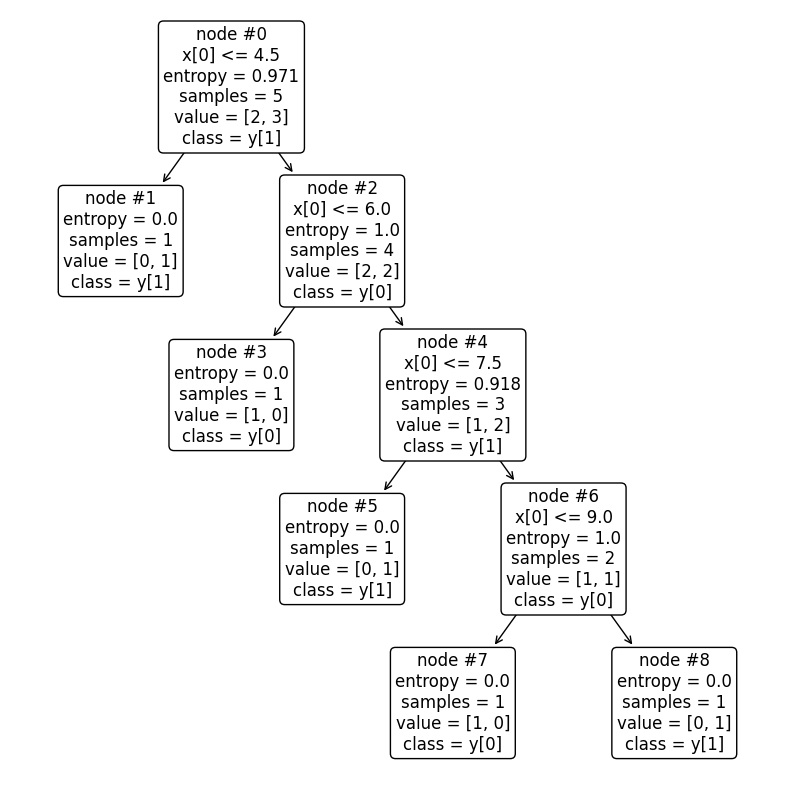

In [127]:
# Plotting the decision tree to confirm our findings above.
plt.figure(figsize=(10,10))
plot_tree(decision_tree=DecisionTreeClassifier(criterion='entropy').fit(toy_df.values[:, 0].reshape(-1, 1), \
                                                                        toy_df.values[:, 1]), impurity=True, \
                                                                            class_names=True, node_ids=True, \
                                                                                precision=3, rounded=True, fontsize=12)
plt.show()

In [128]:
# Note, we could also use the gini criterion to create our tree
# The gini criterion 
# The formula got calculating the gini criterion is

''' 
Gini Impurity is measured between 0 and 1
The lower the value, the cleaner the split of separating the classes
What we want is at every split to have the lowest possible Gini impurity score
The objective is to get leaf nodes that are pure. Meaning a Gini score of 0

The formula for Gini Impurity is 1 - (probability of being in the first class) **2 - (probability of being in the second class) **2
for example  1 - P_class0 ** 2 - P_class1 ** 2 - 
References:
https://data36.com/coding-a-decision-tree-in-python-classification-tree-gini-impurity/

'''
# Define a function to calculate our gini score
def gini_calculator(p0, p1):
    ''' Calculate the Gini score '''
    return 1 - p0**2 - p1**2

In [129]:
# Calculate the Gini score for the root node
# looking at the samples, we know we have 3/5 that are 1s and 2/5 which are 0
# plugging these values into our function, we get 0.48
gini_calculator(3/5, 2/5)

0.48

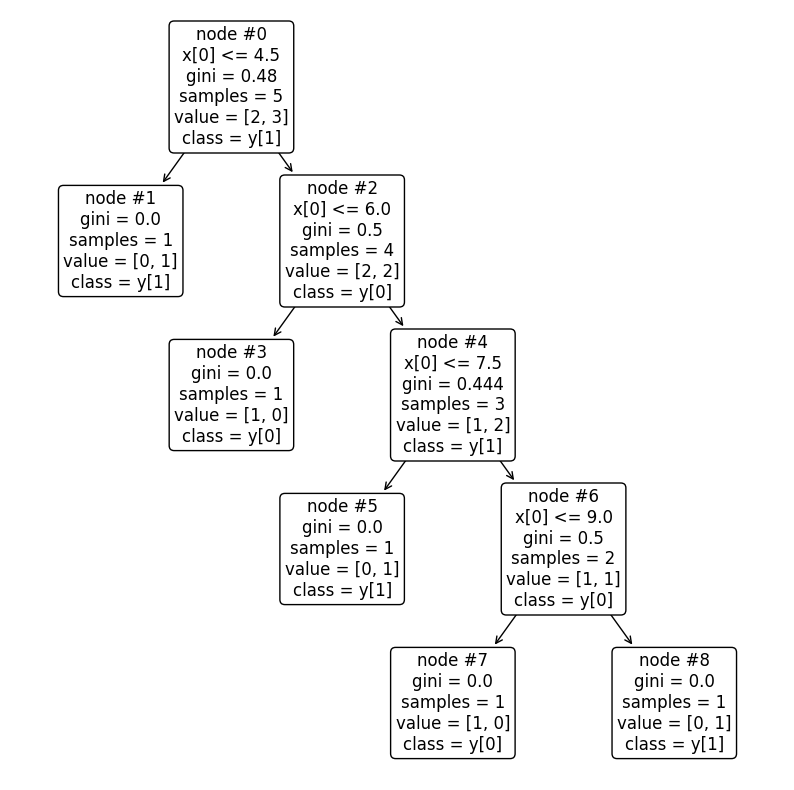

In [130]:
# Plotting the Decision Tree using the 'gini' criterion to confirm our answer above, we see below a perfect match.
plt.figure(figsize=(10,10))
plot_tree(decision_tree=DecisionTreeClassifier(criterion='gini').fit(toy_df.values[:, 0].reshape(-1, 1), \
                                                                     toy_df.values[:, 1]), impurity=True, \
                                                                        class_names=True, node_ids=True, \
                                                                            precision=3, rounded=True, fontsize=12)
plt.show()

In [131]:
# With our understanding of Decision Trees being much better, 
# Time to build the tree for our actual dataset
# We will use 'gini' criterion and allow the tree to go to a depth of 5.
# Let the algorithm also use the best split to build the tree
# Note, in this case, I am using the unscaled training data
# For Decision Tress, there is no need to scale the data
clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, min_samples_leaf=2, random_state=10)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, random_state=10)

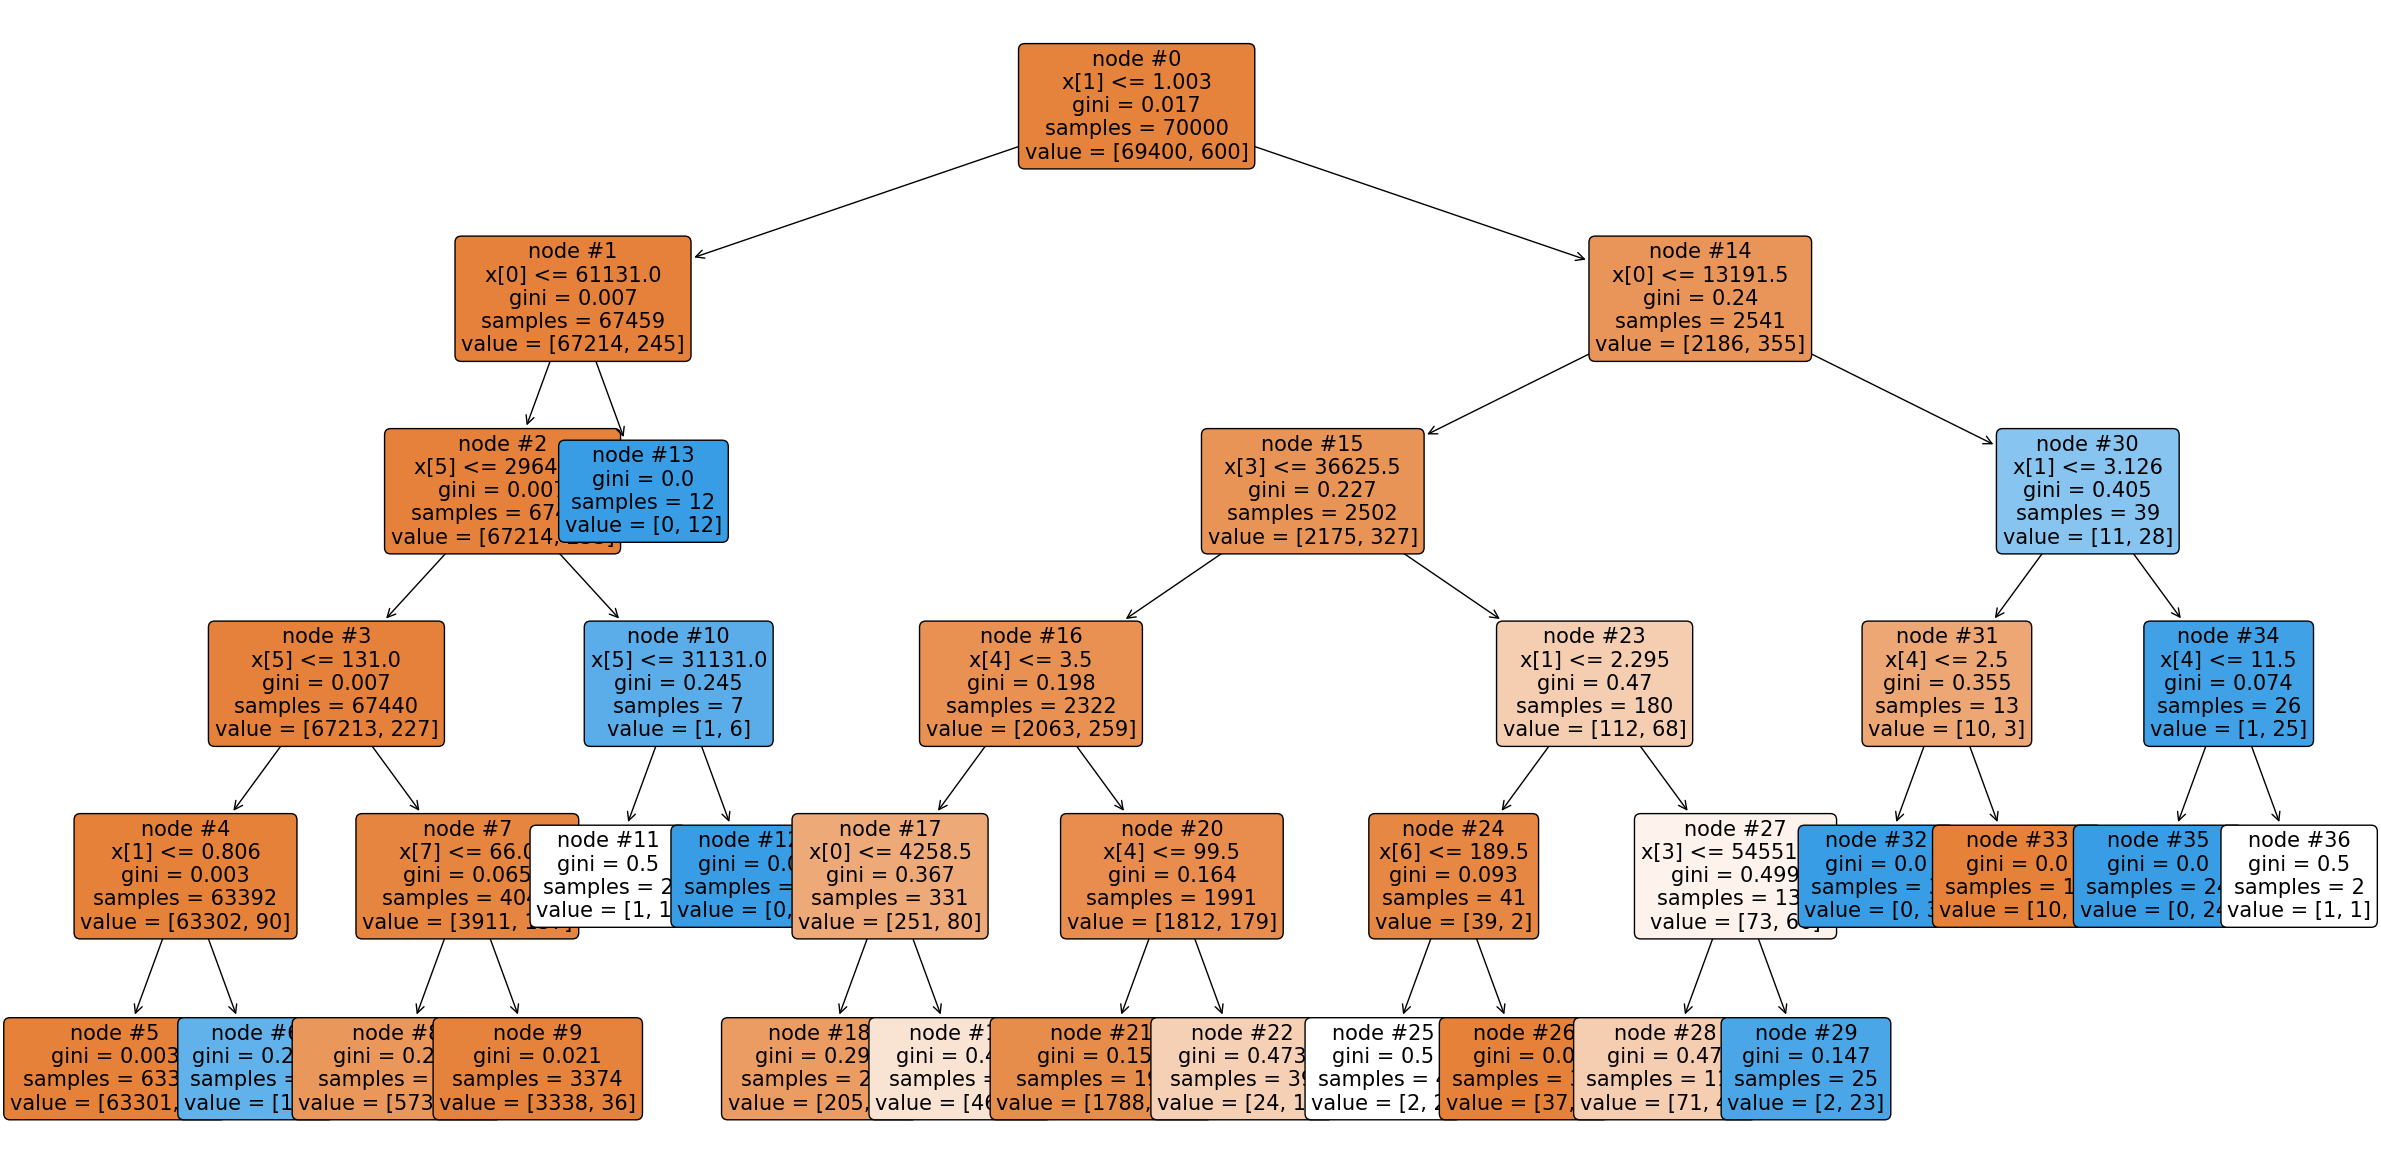

In [132]:
# plot the tree of our dataset
plt.style.use('default')
plt.figure(figsize=(30,15))

# Paint the nodes to indicate majority class of classification
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree
plot_tree(clf_dt, label='all', filled=True, impurity=True, node_ids=True, proportion=False, rounded=True, fontsize=15)
plt.show()

In [133]:
# Get the accuracy score of the tree
# Below we see an accuracy score of 99 on the training data
# Note, I assume there is enough knowledge at this point on how to split the data, 
# Train the tree on one set of data and then make predictions on the previously unseen data
accuracy_score(y_true=y_test, y_pred=clf_dt.predict(X_test))

0.9923666666666666

In [134]:
# Note, we could have accessed the score from directly within the classifier
clf_dt.score(X=X_test, y=y_test)

0.9923666666666666

In [135]:
# Get the depth of our model
clf_dt.get_depth()

5

In [136]:
# Get the number of nodes in the tree
clf_dt.tree_.node_count

37

In [137]:
# Build a simple function to produce the confusion matrix and classification report
def build_cm(model=None, x_test=X_test, y_test=y_test):
    ''' Produces the confusion matrix

    Args:
        model: Trained model
        x_test: Array containing the test features
        y_test: Array containing the test labels    
    '''

    # Setup the Confusion Matrix
    cm = confusion_matrix(y_true=y_test, y_pred=model.predict(x_test), labels=model.classes_)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(include_values=True,\
                                                                                     values_format='d', colorbar=True)

    # Setup the classification report
    print(classification_report(y_true=y_test, y_pred=model.predict(x_test)))
        

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     29743
           1       0.94      0.12      0.21       257

    accuracy                           0.99     30000
   macro avg       0.96      0.56      0.60     30000
weighted avg       0.99      0.99      0.99     30000



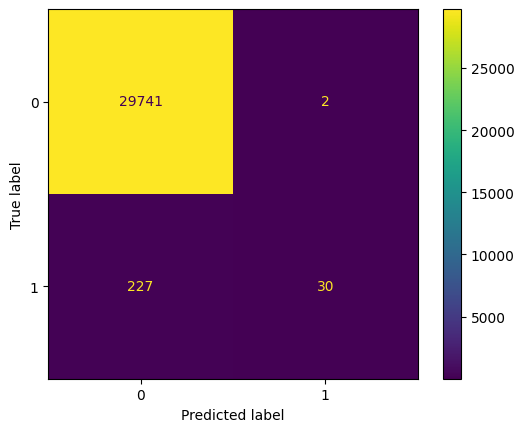

In [138]:
# Get the model metrics
build_cm(model=clf_dt, x_test=X_test, y_test=y_test)

While I can save this model, I will not. <br>
For our purpose, rather than using one Decision Tree is more than likely not the solution to our problem  <br>
Hence we will jump to using Random Forests  <br>

In [ ]:
''' 
Additional References and good reads/videos:

https://www.youtube.com/watch?v=HkIEEOhnwEs&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=88
https://www.youtube.com/watch?v=HkIEEOhnwEs&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=89
https://www.youtube.com/watch?v=eRUK9CEmOcI&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=90
https://www.youtube.com/watch?v=pZ9uGPkqolc&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=91
https://www.youtube.com/watch?v=oK5pBru6Tfo&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=94
https://www.youtube.com/watch?v=LDRbO9a6XPU

https://medium.com/analytics-vidhya/decision-tree-101-e94a5d131fa0
https://en.wikipedia.org/wiki/Decision_tree_learning
https://www.learndatasci.com/glossary/gini-impurity/
https://pandulaofficial.medium.com/implementing-cart-algorithm-from-scratch-in-python-5dd00e9d36e
https://www.raaicode.com/calculating-gini/
https://en.wikipedia.org/wiki/Information_gain_(decision_tree)
https://link.springer.com/content/pdf/10.1007/BF00116251.pdf
'''

Cool we created one Decision Tree, but is that one tree the best to make a prediction?! <br>
My answer is no! That one tree would probably and more than likely overfit. <br> 
We are better off using a combination of trees.  <br>
Also, small changes in one or more of the samples, may result in a much different split of the data  <br>
Training multiple tress, helps to address these peculiarities  <br>
For example, if 5 trees are created as part of an ensemble, then those 5 individual trees would vote on the prediction
majority voting wins. Hence if 3 predicted 1 and 2 predicted 0, then the prediction of the forest is 1.
This makes your prediction more robust <br>

For building the ensemble, we can use strategies such as sampling with replacement  <br>
If we use sample with replacement, then we can build tree, using samples from the dataset. <br>
We then replace the samples and pull another set of samples from the dataset <br>
Do note, we may end up having duplicate data when building this tree as we were sampling with replacement. <br>
Sampling with replacement also means it is quite possible, your split may be similar for different trees.  <br>
Similarly, lower decision nodes may also have similar splits <br>
To mitigate this shortcoming, the algorithm also randomizes the feature set <br>
This change is what Random Forest takes advantage of. <br>
Random Forest uses bagging to build decision trees.  <br>
When bootstrapping is not used, the entire dataset is used to build each tree
Bagging minimizes the variance and overfitting.

In [139]:
# Import the Random Forest Classifier
# https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

In [154]:
# Setup an ensemble of consisting of 100 individual trees
# Add the "bootstrap=True" (default behaviour) to ensure samples of the dataset are used to build the each tree, 
# rather than the entire dataset for each tree.
# Specify "warm_start=False" to build a new forest everytime
clf_random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, 
                                           bootstrap=True, n_jobs=-1, warm_start=False, 
                                           class_weight={0:1, 1:9}, random_state=10)
clf_random_forest.fit(X=X_train, y=y_train)
clf_random_forest

RandomForestClassifier(class_weight={0: 1, 1: 9}, criterion='entropy',
                       max_depth=5, n_jobs=-1, random_state=10)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29743
           1       0.30      0.67      0.41       257

    accuracy                           0.98     30000
   macro avg       0.65      0.83      0.70     30000
weighted avg       0.99      0.98      0.99     30000



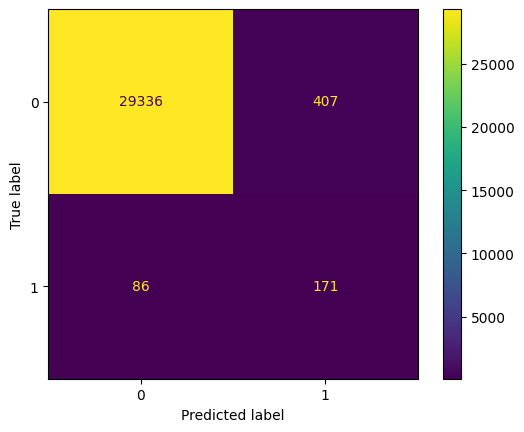

In [155]:
# How is the model doing on the test data?
build_cm(model=clf_random_forest)

In [156]:
# Learning a little bit about the model
# What level of importance is assigned to each feature
clf_random_forest.feature_importances_

array([0.14994302, 0.26578595, 0.10055623, 0.02603698, 0.12039183,
       0.24709326, 0.04848819, 0.04170454])

In [157]:
# What do those values above mean?
# Do they have something to do with the feature labels?
['id.resp_p', 'duration', 'orig_bytes', 'resp_bytes', 'orig_pkts',
                   'orig_ip_bytes','resp_pkts',	'resp_ip_bytes']

['id.resp_p',
 'duration',
 'orig_bytes',
 'resp_bytes',
 'orig_pkts',
 'orig_ip_bytes',
 'resp_pkts',
 'resp_ip_bytes']

In [158]:
# Let's take a quick look at our model, using rfpimp to see if we can answer the two questions above
# https://libraries.io/pypi/rfpimp
import rfpimp

In [159]:
# For rfpimp to work, we need to feed it a Pandas DataFrame
# Setting up a dataframe of the X_test numpy array 
X_test_rfpimp = pd.DataFrame(data=X_test, columns=['id.resp_p', 'duration', 'orig_bytes', 'resp_bytes', 'orig_pkts',
                   'orig_ip_bytes','resp_pkts',	'resp_ip_bytes'])
X_test_rfpimp.head(10)

,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,9200.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,80.0,0.000084,0.0,0.0,1.0,52.0,1.0,40.0
2,80.0,0.000030,0.0,0.0,1.0,52.0,1.0,40.0
3,9200.0,0.000056,0.0,0.0,1.0,52.0,1.0,40.0
4,9200.0,0.000052,0.0,0.0,1.0,52.0,1.0,40.0
5,5228.0,48.288162,791.0,7342.0,11.0,1244.0,9.0,2066.0
6,9200.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,9200.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,443.0,115.196420,675.0,7448.0,10.0,1089.0,11.0,3807.0
9,9200.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
# Similarly, the target/label has to be in a dataframe or panda Series
y_test_rfpimp = pd.DataFrame(data=y_test, columns=['label'])
y_test_rfpimp.head(10)

,label
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [161]:
# Get the importance of each feature
# The warning below is because I remove the column names when I moved the data from a Pandas dataframe to a numpy array
#   df_conn[['id.resp_p', 'duration', 'orig_bytes', 'resp_bytes', 'orig_pkts',
#                   'orig_ip_bytes','resp_pkts',	'resp_ip_bytes']].values
# What is important here is the "".values"
imp = rfpimp.importances(model=clf_random_forest, X_valid=X_test_rfpimp, y_valid=y_test_rfpimp, n_samples=-1)
imp

C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\SecurityNik\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Importance
Feature,
orig_ip_bytes,0.008267
orig_pkts,0.006433
orig_bytes,0.006100
duration,0.005400
resp_ip_bytes,0.001633
id.resp_p,0.000633
resp_pkts,-0.000067
resp_bytes,-0.000167


In [ ]:
# With a dataframe of the features, importance, let's plot this
rfpimp.plot_importances(imp, vscale=1.5, color='red')

In [162]:
# From above it looks like the features which are contributing the most to the prediction on the test data
# are orig_ip_bytes_orig_pkts, duration and resp_bytes
# It looks like the id.res_p, resp_pkts and resp_bytes play little to no role in the predictions on the test data
# Considering what we know now about our model, 
# Let's drop these resp_ip_bytes, id.resp_p, resp_pkts and resp_bytes to see if our model improves or is much the same
# Building a model using same hyper-parameters
clf_random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, 
                                           bootstrap=True, n_jobs=-1, warm_start=False, 
                                           class_weight={0:1, 1:9}, random_state=10)

In [163]:
# Setup a new dataframe consisting of only 4 out of the previous 8 features
X_train_rfpimp = df_conn[['duration', 'orig_bytes', 'orig_pkts', 'orig_ip_bytes']]
X_train_rfpimp.head(5)

,duration,orig_bytes,orig_pkts,orig_ip_bytes
0,0.0,0,0,0
1,0.0,0,0,0
2,0.0,0,0,0
3,0.0,0,0,0
4,0.0,0,0,0


In [164]:
# Split the data the same way as we did previously
X_train, X_test, y_train, y_test = train_test_split(X_train_rfpimp, y_labels, test_size=0.3, 
                                                    train_size=0.7, stratify=y_labels, random_state=10)

In [165]:
# Fit the model on the X_test_rfpimp dataframe dropping those features deemed not important
clf_random_forest.fit(X=X_train, y=y_train)
clf_random_forest

RandomForestClassifier(class_weight={0: 1, 1: 9}, criterion='entropy',
                       max_depth=5, n_jobs=-1, random_state=10)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29743
           1       0.27      0.63      0.38       257

    accuracy                           0.98     30000
   macro avg       0.63      0.81      0.69     30000
weighted avg       0.99      0.98      0.99     30000



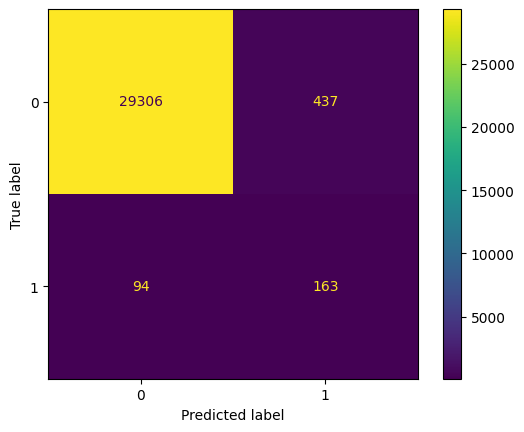

In [167]:
# Call the function to plot the confusion matrix and produce the confusion matrix
build_cm(model=clf_random_forest, x_test=X_test, y_test=y_test)

In [168]:
# Model does not seem to have done that much worse with 50% less features
# Looking at the accuracy score, for sure we would say it is not preparing worse
# The confusion matrix tells a slightly different story
# Also, the values looks better than we got from the Logistic Regression models
# but not as good as the single tree.
clf_random_forest.score(X=X_test, y=y_test)

0.9823

In [169]:
# Let's save the smaller model,
# Note we could also have saved the previous one
# You make a choice and live with that choice

# Create the location to save the model
PATH = './SAVED_MODELS/RANDOM_FOREST/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

# Saving the model to disk
dump(value=clf_random_forest, filename=f'{PATH}/model_clf_random_forest.joblib')

['./SAVED_MODELS/RANDOM_FOREST//model_clf_random_forest.joblib']

In [170]:
# Load the model
loaded_clf_random_forest = load(filename='./SAVED_MODELS/RANDOM_FOREST/model_clf_random_forest.joblib')
loaded_clf_random_forest

RandomForestClassifier(class_weight={0: 1, 1: 9}, criterion='entropy',
                       max_depth=5, n_jobs=-1, random_state=10)

In [171]:
# Make a prediction on the loaded model
loaded_clf_random_forest.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
# Additional Good Read
# https://mlbook.explained.ai/

There is also boosting <br>
Boosting minimizes the bias and underfitting <br>
In boosting, we want to take a single weak model and combine it with other weak models to make a collectively much stronger model <br>
In boosting, trees are built sequentially <br>
When building for example the second tree, rather than sampling equally, you instead pick the samples or subset of samples that the previously trained trees model misclassified or did not perform well on. <br>
This helps the algorithm to do better in the long term.
For example, if the algorithm misclassified a few examples in the original training set, the next tree built, the algorithm will focus more on picking those records which were previously misclassified
When using tree based algorithms like XGBoot, rather than using sampling with replacement, XGBoost assign different weights to different samples   
XGBoost is Extreme Gradient Boosting (XGBoost)
XGBoost is an Ensemble Learning Algorithm
XGBoost iteratively trains an ensemble of shallow Decision Trees, with the aim of making the next model better than the previous.
The final prediction in XGBoost is a weighted sum of all predictions

In [172]:
# Import the XGBoost library
from xgboost import XGBClassifier

In [173]:
# Building the model
# There are lots of hyper-parameters you can set for XGBoost
clf_xgboost = XGBClassifier(n_estimators=100, verbosity=0, max_depth=5, 
                            eta=0.9, nthread=-1, objective='binary:logistic', eval_metric='error', reg_alpha=0)
clf_xgboost.fit(X=X_train, y=y_train)
clf_xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.9, eval_metric='error',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              nthread=-1, num_parallel_tree=None, ...)

In [174]:
# Make a prediction
clf_xgboost.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [175]:
# Get the accuracy
#accuracy_score(y_true=y_labels, y_pred=xg_model.predict(X_data))
clf_xgboost.score(X=X_test, y=y_test)

0.995

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29743
           1       0.79      0.57      0.66       257

    accuracy                           0.99     30000
   macro avg       0.89      0.79      0.83     30000
weighted avg       0.99      0.99      0.99     30000



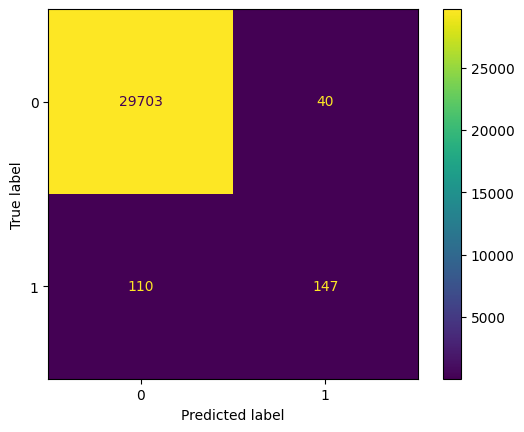

In [176]:
# With 99% accuracy, let's see what the confusion matrix suggest
build_cm(model=clf_xgboost, x_test=X_test, y_test=y_test)

In [177]:
# We now have Decision Trees, Random Forest and XGBoost, all tree based algorithms to choose from
# Saving this model

# Create the location to save the model
PATH = './SAVED_MODELS/XG_BOOST/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

# Saving the model to disk
dump(value=clf_xgboost, filename=f'{PATH}/model_clf_xgboost.joblib') 

['./SAVED_MODELS/XG_BOOST//model_clf_xgboost.joblib']

In [178]:
# Load the model
loaded_clf_xgboost = load(filename='./SAVED_MODELS/XG_BOOST/model_clf_xgboost.joblib')
loaded_clf_xgboost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.9, eval_metric='error',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              nthread=-1, num_parallel_tree=None, ...)

In [179]:
# Make predictions on the first 5 samples
loaded_clf_xgboost.predict(X_test[:5])

array([0, 0, 0, 0, 0])

In [180]:
np.set_printoptions(suppress=True)
# Get the probabilities for those predictions
# Left side represents probability of being 0 while right side represents probability of being 1
loaded_clf_xgboost.predict_proba(X_test[:5])

array([[0.99810034, 0.00189963],
       [0.9999941 , 0.00000592],
       [0.9999941 , 0.00000592],
       [0.9999941 , 0.00000592],
       [0.9999941 , 0.00000592]], dtype=float32)

In [181]:
# Time to move on from the tree based models

In [ ]:
''' 
Additional References and good reads/videos:
https://www.youtube.com/watch?v=yoYgcddMXrg&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=96
https://www.youtube.com/watch?v=dELaA7ZykMs&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=97
https://www.youtube.com/watch?v=VfKwWWrSnq4&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=98
https://www.youtube.com/watch?v=4e4BTYrA0IE&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=99
https://www.youtube.com/watch?v=ckbQPwQ6y98&list=PLxfEOJXRm7eZKJyovNH-lE3ooXTsOCvfC&index=100
https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/
https://xgboost.readthedocs.io/en/stable/get_started.html
https://developer.nvidia.com/blog/gradient-boosting-decision-trees-xgboost-cuda/
https://xgboost.readthedocs.io/en/stable/parameter.html
https://xgboost.readthedocs.io/en/stable/tutorials/model.html
https://xgboost.readthedocs.io/en/latest/parameter.html

https://www.youtube.com/watch?v=WZvPUGNJg18
'''

In [182]:
# Support Vector Machines can be used for classification, regression and Anomaly detection
# Each data point is plotted in an n-dimensional space.
# n is based on the number of features
# In this case, we have 6 features as can be seen in our first sample
# For our dataset, we want to find the hyperplane that differentiates our two classes
# In finding the classes, we need a hyperplane that allows us to have the widest margin
# SVM attempts to finds a maximal margin hyperplane, that splits the data cleanly into separate classes
# The wider the margin the better the classifier will be
# Get a sample of from the scaled and PCA'd data
X_train_scaled_pca[0], y_train[0]

(array([-0.0444545 , -0.0772815 ,  0.11715776, -0.00106767, -0.0141236 ,
        -0.00353413]),
 0)

In [184]:
# Before building on our real data
# Let's use a synthetic dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.datasets import make_blobs

In [185]:
# Create a synthetic dataset that is linearly separable
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1, random_state=2)
X[:5], y[:5]

(array([[ 0.18757605, -9.8171527 ],
        [-3.93955141, -9.57292799],
        [-0.72864791, -7.18926735],
        [ 0.27399572, -1.87696674],
        [ 1.35238289, -0.67133173]]),
 array([0, 0, 0, 1, 1]))

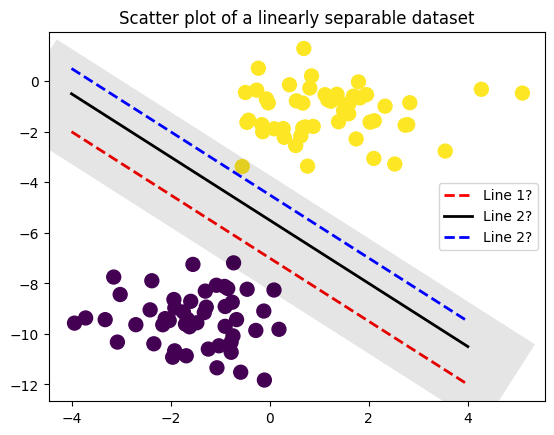

In [186]:
# Below we have 3 lines that separate this data perfectly.
# With SVC the idea is to find the line that allows for the maximum margin, this is the center line
# The lines to the left and right of the center line makes up the margin
# The points on the line are the support vectors
x_lim = [-4., 4]
plt.title('Scatter plot of a linearly separable dataset')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.plot(x_lim, [-2., -12], label='Line 1?', linestyle='--', lw=2, c='r')
plt.plot(x_lim, [-.5, -10.5], label='Line 2?', linestyle='-', lw=2, c='black')
plt.plot(x_lim, [-1, -11.], linestyle='-', lw=70, c='black', alpha=0.1)
plt.plot(x_lim, [.5, -9.5], label='Line 2?', linestyle='--', lw=2, c='blue')
plt.legend(loc='best')

In [187]:
# Wrapping this up with Support Vector Machines
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# import the SVC classifier
from sklearn.svm import SVC

In [188]:
# Setup SVC to use a linear classifier
# Set the regularization parameter to 1
# We learn more about regularization below and more specifically in notebook
#   21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) 
svc = SVC(kernel='linear', C=1.).fit(X, y)
svc

SVC(kernel='linear')

In [189]:
# Find the support vector 
# We have two and their x and y values
svc.support_vectors_

array([[-0.72864791, -7.18926735],
       [-0.55342505, -3.37620408]])

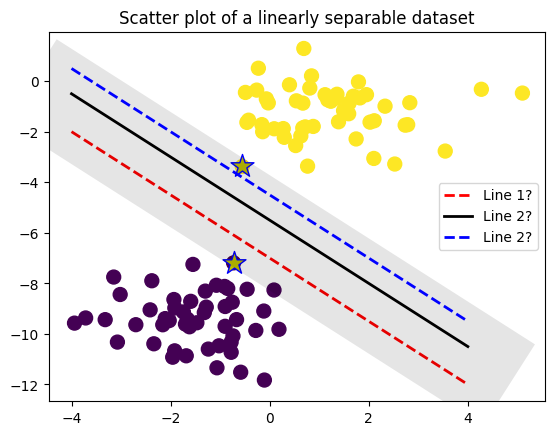

In [190]:
# Replotting the graph, this time with the Support Vectors
# Based on the coordinates above
x_lim = [-4., 4]
plt.title('Scatter plot of a linearly separable dataset')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.plot(x_lim, [-2., -12], label='Line 1?', linestyle='--', lw=2, c='r')
plt.plot(x_lim, [-.5, -10.5], label='Line 2?', linestyle='-', lw=2, c='black')
plt.plot(x_lim, [-1, -11.], linestyle='-', lw=70, c='black', alpha=0.1)
plt.plot(x_lim, [.5, -9.5], label='Line 2?', linestyle='--', lw=2, c='blue')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], marker='*', s=300,  alpha=1, edgecolors='b', c='y')
plt.legend(loc='best')

In [191]:
# Import the library to plot the Decision Boundary
# https://scikit-learn.org/dev/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator
from sklearn.inspection import DecisionBoundaryDisplay

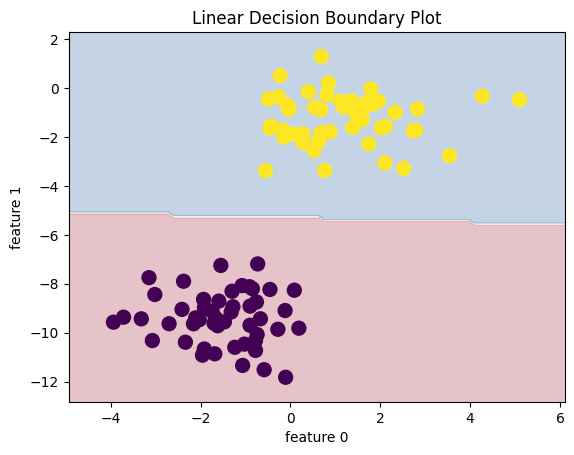

In [192]:
# Plot of the decision boundary showing a line cleanly separates the data
DecisionBoundaryDisplay.from_estimator(estimator=svc, X=X, cmap='RdBu', 
                                       alpha=0.25, response_method='predict', xlabel='feature 0', ylabel='feature 1')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=100, alpha=1.)
_ = plt.title('Linear Decision Boundary Plot')


In [193]:
# Above shows the decision boundary is linearly separable
# cool!

In [194]:
# In this case, using make_moons to make a non linear dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
from sklearn.datasets import make_moons
import seaborn as sns

In [195]:
# Make the datasets that is not linearly separable
X, y = make_moons(n_samples=200, noise=0.15, random_state=10)

# Get the first 10 records
X[:10], y[:10]

(array([[-0.52509154,  0.99031753],
        [ 1.0920111 ,  0.1286312 ],
        [ 0.82325397,  0.70750724],
        [ 1.94959847,  0.47171465],
        [-0.07093487,  1.05126847],
        [ 0.86820424,  0.77810295],
        [ 1.41947746, -0.27386714],
        [-0.28935822,  1.05356542],
        [-0.31551311,  0.71695407],
        [ 0.97658385, -0.07669179]]),
 array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64))

In [196]:
# Stack the features and the labels into one dataset
X_data = np.hstack((X, y.reshape(-1, 1)))
X_data[:10]

array([[-0.52509154,  0.99031753,  0.        ],
       [ 1.0920111 ,  0.1286312 ,  0.        ],
       [ 0.82325397,  0.70750724,  0.        ],
       [ 1.94959847,  0.47171465,  1.        ],
       [-0.07093487,  1.05126847,  0.        ],
       [ 0.86820424,  0.77810295,  0.        ],
       [ 1.41947746, -0.27386714,  1.        ],
       [-0.28935822,  1.05356542,  0.        ],
       [-0.31551311,  0.71695407,  0.        ],
       [ 0.97658385, -0.07669179,  0.        ]])

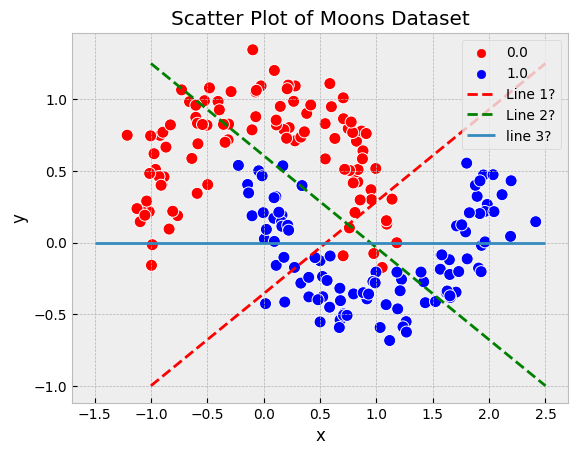

In [197]:
# Visualize the data
# As we can see this data is not linearly separable
# Which line works best?
plt.style.use('bmh')
plt.title('Scatter Plot of Moons Dataset')
sns.scatterplot(data=X_data, x=X_data[:, 0], y=X_data[:, 1], hue=X_data[:, 2], palette=['red', 'blue'], s=75)

#plt.scatter(x=X_data[:, 0], y=X_data[:, 1], c=X_data[:, 2], s=100)
plt.plot([-1., 2.5], [-1., 1.25], label='Line 1?', linestyle='--', lw=2, c='r')
plt.plot([-1., 2.5], [1.25, -1.], label='Line 2?', linestyle='--', lw=2, c='g')
plt.hlines(y=[0.], xmin=-1.5, xmax=2.5, linestyles='-', lw=2, label='line 3?')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

In [198]:
# None of the above lines fits the dataset well
# For this dataset, the Radial Basis Function (RBF) Kernel is more than likely best
# Setup the model with the linear classifier again
svc = SVC(kernel='linear', C=1.).fit(X_data[:, [0,1]], X_data[:, 2])
svc

SVC(kernel='linear')

In [199]:
# Get the support vectors
# We have 68 vectors now
svc.support_vectors_, len(svc.support_vectors_)

(array([[ 1.0920111 ,  0.1286312 ],
        [ 0.82325397,  0.70750724],
        [ 0.86820424,  0.77810295],
        [ 0.97658385, -0.07669179],
        [-0.99551157, -0.15887894],
        [ 0.99450208,  0.51674846],
        [ 1.05113714, -0.17409587],
        [ 0.83526002,  0.42353323],
        [-0.58999206,  0.3433834 ],
        [ 0.80875784,  0.48903618],
        [ 0.88093715,  0.64002421],
        [-0.76347759,  0.18762882],
        [-0.83894214,  0.09411438],
        [ 0.54670341,  0.58384085],
        [ 0.83715674,  0.50970457],
        [ 1.18051282, -0.00148135],
        [ 0.76204048,  0.50335256],
        [-0.9879617 , -0.01502393],
        [ 0.87599763,  0.58446418],
        [ 1.13858214,  0.3031641 ],
        [ 0.78928408,  0.76813269],
        [ 0.95205351,  0.36874485],
        [ 1.08862876,  0.15250319],
        [-1.09529077,  0.14556421],
        [ 0.71851064,  0.51103131],
        [ 0.90990393,  0.76084202],
        [-1.05362934,  0.19052612],
        [-0.80698904,  0.218

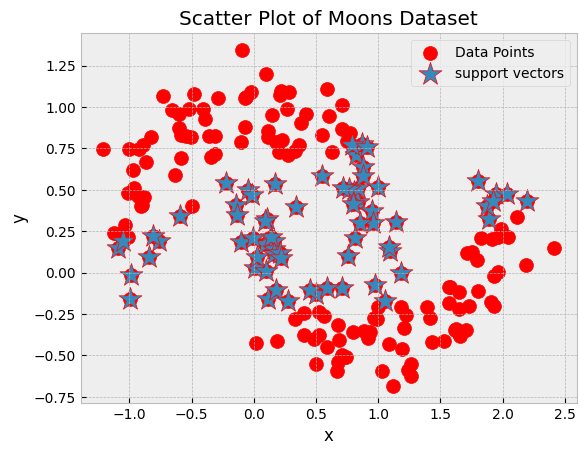

In [200]:
# Re-plot the moons
# Visualize the data
# As we can see this data is not linearly separable
# Which line works best

plt.style.use('bmh')
plt.title('Scatter Plot of Moons Dataset')

# Plot the x and y
plt.scatter(x=X[:, 0], y=X[:, 1], c='r', s=100, alpha=1, label='Data Points' )

# Plot the support vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], label='support vectors', 
            marker='*', s=300, alpha=1, edgecolors='red')
#plt.plot(svc.support_vectors_[:, 0], linestyle='-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')


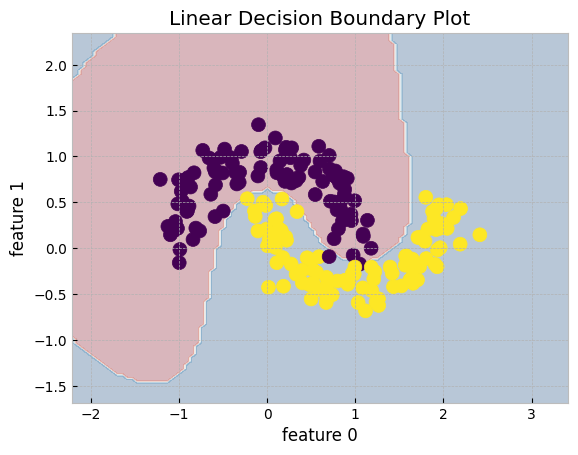

In [203]:
# Plot of the decision boundary showing a straight line cannot cleanly split the data
DecisionBoundaryDisplay.from_estimator(estimator=svc, X=X_data[:, [0,1]], cmap='RdBu', 
                                       alpha=0.25, response_method='predict', xlabel='feature 0', ylabel='feature 1')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=100, alpha=1.)
_ = plt.title('Linear Decision Boundary Plot')


In [204]:
# With the understanding that a linear model cannot properly separate this data, 
# time to look at a different kernel. Above linear was used kernel='linear'
# considering that polynomial is used in 
#   11 - Beginning Linear Regression - Machine Learning <br>
# I will use a Radial Basis Function (RBF) here
# Smaller C, allows for a softer margin and likely misclassification
# larger C means hard margin
# Gamma is set to the default 'scale'
svc = SVC(kernel='rbf', C=10., gamma='scale').fit(X_data[:, [0,1]], X_data[:, 2])
svc

SVC(C=10.0)

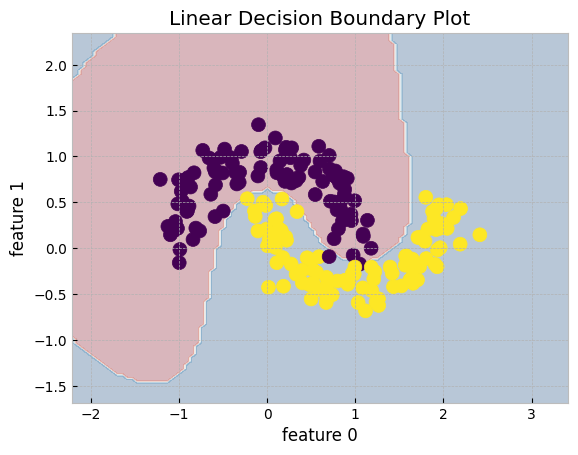

In [205]:
# This decision boundary looks much better than when we used the linear kernel
DecisionBoundaryDisplay.from_estimator(estimator=svc, X=X_data[:, [0,1]], 
                                       cmap='RdBu', alpha=0.25, response_method='predict', 
                                       xlabel='feature 0', ylabel='feature 1')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=100, alpha=1.)
_ = plt.title('Linear Decision Boundary Plot')

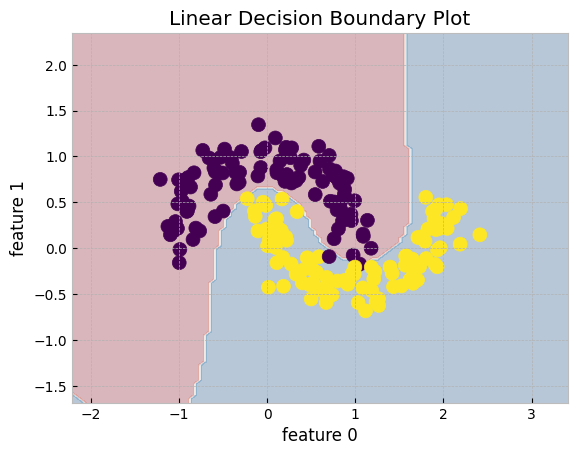

In [206]:
# Changing the value of gamma to numerical - 1 
# This does not seem to make things much different from above
svc = SVC(kernel='rbf', C=10., gamma=1).fit(X_data[:, [0,1]], X_data[:, 2])
DecisionBoundaryDisplay.from_estimator(estimator=svc, X=X_data[:, [0,1]], 
                                       cmap='RdBu', alpha=0.25, response_method='predict', 
                                       xlabel='feature 0', ylabel='feature 1')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=100, alpha=1.)
_ = plt.title('Linear Decision Boundary Plot')


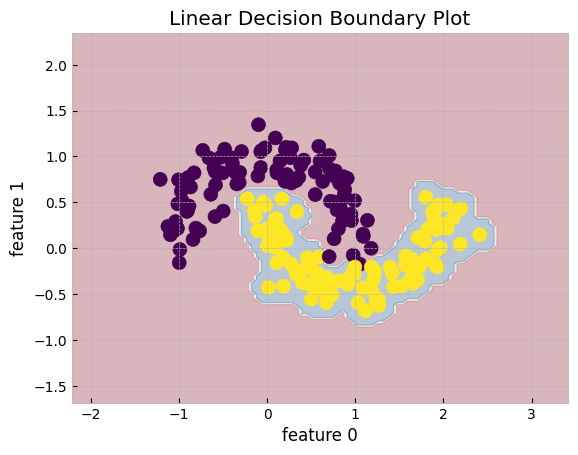

In [207]:
# Changing the value of gamma to numerical - 100 - rather than the previous "scale"
# This looks much tighter but definitely too tight!
svc = SVC(kernel='rbf', C=10., gamma=100).fit(X_data[:, [0,1]], X_data[:, 2])
DecisionBoundaryDisplay.from_estimator(estimator=svc, X=X_data[:, [0,1]], 
                                       cmap='RdBu', alpha=0.25, response_method='predict', 
                                       xlabel='feature 0', ylabel='feature 1')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=100, alpha=1.)
_ = plt.title('Linear Decision Boundary Plot')


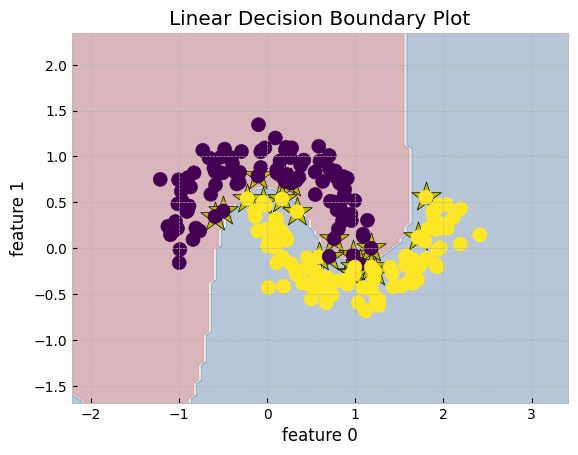

In [208]:
# One more plot, this time with the support vectors
svc = SVC(kernel='rbf', C=10., gamma=1).fit(X_data[:, [0,1]], X_data[:, 2])
DecisionBoundaryDisplay.from_estimator(estimator=svc, X=X_data[:, [0,1]], \
                                       cmap='RdBu', alpha=0.25, response_method='predict', \
                                        xlabel='feature 0', ylabel='feature 1')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], label='support vectors', \
            marker='*', s=500, alpha=1, edgecolors='black', c='y')
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=100, alpha=1.)
_ = plt.title('Linear Decision Boundary Plot')


In [209]:
# With the understanding of how how support vectors works and how we handle linear and non-linearly separable data,
# Time to run SVC with RBF on our real data
# Do note, we won't be able to plot this decision boundary as we have 6 features
# This means we are outside of 2 and 3 dimension we are able to plot.
# We can use some type of grid or parameter search or something similar
# to find the right combination of C and gama
clf_svc = SVC(kernel='rbf', C=5000, gamma=100, class_weight={0:1, 1:9}).fit(X_train_scaled_pca, y_train)
clf_svc

SVC(C=5000, class_weight={0: 1, 1: 9}, gamma=100)

In [210]:
# Getting the score of the model
clf_svc.score(X=X_test_scaled_pca, y=y_test)

0.9873666666666666

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29743
           1       0.36      0.60      0.45       257

    accuracy                           0.99     30000
   macro avg       0.68      0.79      0.72     30000
weighted avg       0.99      0.99      0.99     30000



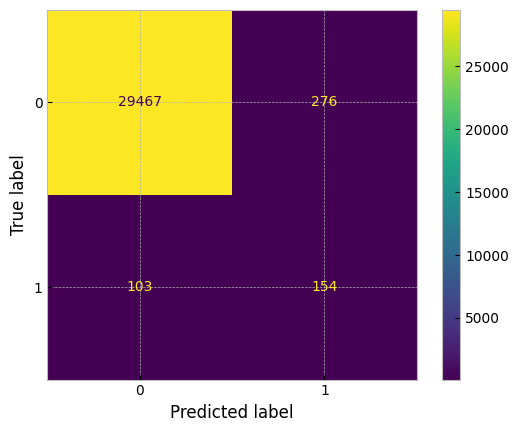

In [211]:
# Looking at the confusion matrix
build_cm(model=clf_svc, x_test=X_test_scaled_pca, y_test=y_test)

In [212]:
# Make some predictions on our test data
clf_svc.predict(X_test_scaled_pca)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [213]:
# Time to save the model
# Create the location to save the model
PATH = './SAVED_MODELS/SVC/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

# Saving the model to disk
dump(value=clf_svc, filename=f'{PATH}/model_clf_svc.joblib')

['./SAVED_MODELS/SVC//model_clf_svc.joblib']

In [214]:
# Load the model
loaded_clf_svc_model = load(filename='./SAVED_MODELS/SVC/model_clf_svc.joblib')
loaded_clf_svc_model

SVC(C=5000, class_weight={0: 1, 1: 9}, gamma=100)

In [215]:
# Make some predictions on the loaded model
loaded_clf_svc_model.predict(X_test_scaled_pca)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [216]:
# Ok then! That's it for this notebook.

In [ ]:
''' 
Additional References and good reads/videos:

https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/
https://www.saedsayad.com/support_vector_machine_reg.htm
https://nyandwi.com/machine_learning_complete/15_support_vector_machines_for_regression/
https://www2.cs.uh.edu/~ceick/ML/SVM-Regression.pdf
https://stats.stackexchange.com/questions/82044/how-does-support-vector-regression-work-intuitively
https://stats.stackexchange.com/questions/82044/how-does-support-vector-regression-work-intuitively
https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0
https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d
https://hands-on.cloud/implementation-of-support-vector-machine-svm-using-python/
https://medium.com/@suvigya2001/the-gaussian-rbf-kernel-in-non-linear-svm-2fb1c822aae0
https://faun.pub/learn-about-kernel-svm-non-linear-svm-4987e0f5cf97
https://laptrinhx.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-3482954279/
https://medium.com/analytics-vidhya/introduction-to-svm-and-kernel-trick-part-1-theory-d990e2872ace
https://www.robots.ox.ac.uk/~az/lectures/ml/lect3.pdf
https://www.robots.ox.ac.uk/~az/lectures/ml/lect2.pdf
https://www.analyticsvidhya.com/blog/2021/04/insight-into-svm-support-vector-machine-along-with-code/
https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/
https://www.youtube.com/watch?v=Q7vT0--5VII
https://inria.github.io/scikit-learn-mooc/python_scripts/logistic_regression_non_linear.html
https://mubaris.com/posts/svm/


'''